# Everymind - FireData

Neste notebook, apresentamos a descrição do processo de desenvolver um modelo preditivo de classificação capaz de identificar quais funcionários têm tendências a sair ou permanecer na empresa.

## Integrantes

*   Alexandre Fonseca de Souza
*   Bruno Otavio Bezerra de Meira
*   Filipi Enzo Siqueira Kikuchi
*   Gabriela de Morais da Silva
*   João Pedro Sartori Garcia de Alcaraz
*   Lucas Conti Pereira
*   Sofia Moreiras Pimazzoni

## Definição do problema

A Everymind é uma empresa certificada SalesForce que está preocupada com sua alta taxa de Turnover e possui dificuldades em analisar os motivos responsáveis pela alta rotatividade. Neste contexto, a empresa forneceu dados referentes aos colaboradores (salário, cargo, data de entrada/saída, etc.) para que possamos desenvolver um modelo preditivo de classificação capaz de identificar quais funcionários têm tendências a sair ou permanecer no trabalho.

A solução proposta deverá ser usada como complementação do sistema atual pelo setor de RH, facilitando o processo, e como uma ferramenta de análise que possibilite a identificação de eventuais fatores que contribuem para uma demissão a fim de diagnosticá-los e contribuir para a tomada da melhor decisão possível. Consequentemente, isso será benéfico para a Everymind pois é melhor para uma empresa manter os funcionários a longo prazo. Dessa forma, serão usados dois critérios: a taxa de precisão do algoritmo e a taxa de Turnover da empresa para avaliar o desempenho da solução.


Primeiramente, utilizaremos o arquivo que contém a base de dados dos colaboradores para a future engineering.

#1.Preparação do algoritmo

Para nossa solução funcionar corretamente e sem erros, primeiramente precisaremos importar bibliotecas com funções e funcionalidades que agregam para o modelo preditivo. Também será feita a importação do banco de dados para análises futuras.

## 1.1 Importação de Bibliotecas

Para que o algoritmo funcione da forma desejada, primeiro instalamos e importamos funções e bibliotecas que auxiliam na execução de algumas tarefas. Todas as importações estão listadas abaixo:

In [1]:
# Numpy
import numpy as np

# Instalando o moment
!pip install moment

# Pandas
import pandas as pd

# Instalando o shap
!pip install shap

# Shap
import xgboost
import shap

# Scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix, f1_score,roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, linear_model, datasets, decomposition
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler



# Datetime
from datetime import datetime, date
import time

# Moment
import moment
import plotly.express as px

# Matplotlib
import matplotlib.pyplot as plt

# Graphviz
import graphviz
from graphviz import Source

# Yellowbrick
from yellowbrick.classifier import ConfusionMatrix

# Oversampling
from imblearn.over_sampling import RandomOverSampler

# SHAP
!pip install shap
import pandas as pd
from patsy import dmatrices
import xgboost
import shap

# Google Drive
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 37.6 MB/s 
     |████████████████████████████████| 749 kB 64.0 MB/s 
     |████████████████████████████████| 66 kB 5.2 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


## 1.2 Importação do banco de dados

Para que o algoritmo consiga performar, precisamos importar o arquivo contendo os dados, a fim de tratá-los e posteriormente fazer analises mais acuradas. Como possuímos três tabelas com dados diferentes, separamo-nos em 3 dataframes diferentes.

In [2]:
# Dataframe da tabela "Everymind"
df_everymind = pd.read_excel('/content/drive/Shareddrives/Base de dados/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo - August 3, 10_51 AM.xlsx', sheet_name = "Everymind")

# Dataframe da tabela "Reconhecimento"
df_reconhecimento = pd.read_excel('/content/drive/Shareddrives/Base de dados/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo - August 3, 10_51 AM.xlsx', sheet_name = "Reconhecimento")

# Dataframe da tabela "Ambiente de trabalho"
df_ambiente = pd.read_excel('/content/drive/Shareddrives/Base de dados/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo - August 3, 10_51 AM.xlsx', sheet_name = "Ambiente de Trabalho 27.07")

# Dataframe da tabela "Performance"
df_performance = pd.read_excel('/content/drive/Shareddrives/Base de dados/Novas Informacoes_Eveymind_27.09.22.xlsx', sheet_name = "Performance 20 a 22")

# Dataframe da tabela "Horas Extras"
df_horas = pd.read_excel('/content/drive/Shareddrives/Base de dados/Novas Informacoes_Eveymind_27.09.22.xlsx', sheet_name = "HEs_2020 a 22")


#2.Análises gráficas e Compreensão dos Dados (CRISP-DM)

Aqui apresentaremos a descrição estatística básica dos dados, principalmente dos atributos de interesse, com inclusão de visualizações gráficas e como essas análises embasam suas hipóteses.


##2.1 Verificação dos tipos dos dados

Como a manipulação dos dados exige que eles estejam todos em formato de número primeiramente iremos verificar quais dado precisarão ser tranformados ou derivados em números e se existem dados em branco.

###2.1.1 Tabela "Everymind"

In [3]:
print("Tabela Everymind")
df_everymind.info()

Tabela Everymind
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Matrícula      475 non-null    float64       
 1   Nome Completo  475 non-null    object        
 2   Dt Admissao    475 non-null    object        
 3   Dt Saida       191 non-null    datetime64[ns]
 4   Tipo Saida     191 non-null    object        
 5   Cargo          475 non-null    object        
 6   Salario Mês    475 non-null    float64       
 7   Dt Nascimento  475 non-null    datetime64[ns]
 8   Genero         475 non-null    object        
 9   Etnia          475 non-null    object        
 10  Estado Civil   475 non-null    object        
 11  Escolaridade   475 non-null    object        
 12  Estado         475 non-null    object        
 13  Cidade         475 non-null    object        
 14  Area           475 non-null    object        
dtypes: dat

### 2.1.2 Tabela "Reconhecimento"

In [4]:
print("Tabela Reconhecimento")
df_reconhecimento.info()

Tabela Reconhecimento
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Matricula         339 non-null    float64       
 1   Codinome          339 non-null    object        
 2   Situação          339 non-null    object        
 3   Data de Admissão  339 non-null    datetime64[ns]
 4   Data Vigência     339 non-null    datetime64[ns]
 5   Novo Cargo        339 non-null    object        
 6   Novo Salario      339 non-null    float64       
 7   Motivo            339 non-null    object        
 8   Alterou Função    339 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 24.0+ KB


### 2.1.3 Tabela "Ambiente de trabalho"

In [5]:
print("Tabela Ambiente de trabalho")
df_ambiente.info()

Tabela Ambiente de trabalho
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Divisao                 1694 non-null   object
 1   Pilar                   1694 non-null   object
 2   Pontuação               1694 non-null   object
 3   Fator                   1694 non-null   object
 4   Pontuação.1             1694 non-null   object
 5   Pergunta                1694 non-null   object
 6   Pulou                   243 non-null    object
 7   Muito Insatisfeito      126 non-null    object
 8   Insatisfeito            289 non-null    object
 9   Neutro                  422 non-null    object
 10  Satisfeito              1018 non-null   object
 11  Muito Satisfeito        1204 non-null   object
 12  Taxa de Confiabilidade  1694 non-null   object
dtypes: object(13)
memory usage: 172.2+ KB


### 2.1.4 Tabela "Performance"

In [6]:
print("Tabela Performance")
df_performance.info()

Tabela Performance
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Codinome             251 non-null    object 
 1   Auto Avaliacao 20    91 non-null     float64
 2   Avaliacao Gestor 20  65 non-null     float64
 3   Auto Avaliacao 21    104 non-null    float64
 4   Avaliacao Gestor 21  102 non-null    float64
 5   Auto Avaliacao 22    94 non-null     float64
 6   Avaliacao Gestor 22  131 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


### 2.1.5 Tabela "Horas Extras"

In [7]:
print("Tabela Horas Extras")
df_horas.info()

Tabela Horas Extras
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Codinome               475 non-null    object 
 1   DEZ19 A JUL20 - Qtde   73 non-null     float64
 2   DEZ19 A JUL20 - Valor  73 non-null     float64
 3   AGO A NOV20 - Qtde     55 non-null     float64
 4   AGO A NOV20 - Valor    55 non-null     float64
 5   DEZ20 A MAR21 - Qtde   56 non-null     float64
 6   DEZ20 A MAR21 - Valor  56 non-null     float64
 7   ABR A JUL21 - Qtde     75 non-null     float64
 8   ABR A JUL21 - Valor    75 non-null     float64
 9   AGO A NOV21 - Qtde     78 non-null     float64
 10  AGO A NOV21 - Valor    78 non-null     float64
 11  DEZ21 A MAR22 - Qtde   132 non-null    float64
 12  DEZ21 A MAR22 - Valor  132 non-null    float64
 13  ABR A JUL22 - Qtde     102 non-null    float64
 14  ABR A JUL22 - Valor    102 non-null   

## 2.2 Análises gráficas - Histogramas

Agora apresentaremos alguns histogramas de alguns dos dados númericos de todas as tabelas, histograma consiste em um gráfico de barras que demonstra uma distribuição de frequências, onde a base de cada uma das barras representa uma classe, e a altura a quantidade ou frequência com que o valor da classe ocorre, utilizaremos estes histogramas para identificar indicadores de dispersão, distribuição e limites de especificações.

### 2.2.1 Tabela "Everymind"

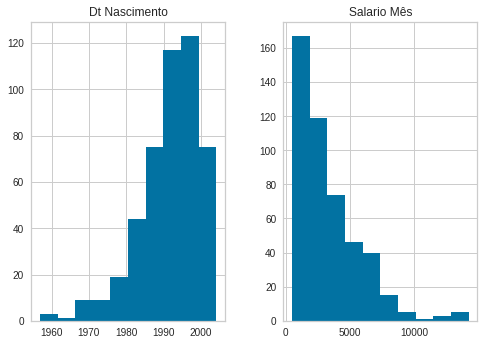

In [8]:
hist_one = pd.DataFrame()
hist_one = pd.concat([hist_one ,df_everymind['Dt Nascimento']], axis = 1)
hist_one = pd.concat([hist_one ,df_everymind['Salario Mês']], axis = 1)

hist_one = hist_one.hist()

O gráfico acima mostra que, dos colaboradores da empresa a grande maioria nasceu entre os anos de 1990 e 2000 e que também a grande maioria recebe um salario menor que R$2.500,00.


### 2.2.2 Tabela "Reconhecimento"

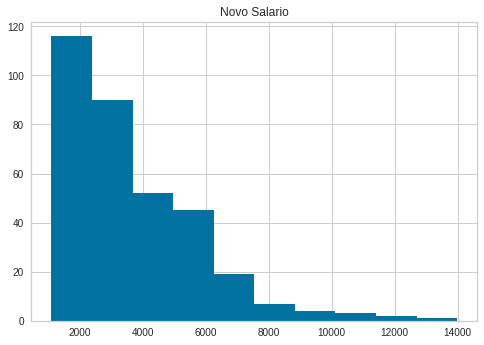

In [9]:
hist_two = pd.DataFrame()
hist_two = pd.concat([hist_two ,df_reconhecimento['Novo Salario']], axis = 1)

hist_two = hist_two.hist()

O gráfico acima mostra que, de todos os colaboradores da empresa que receberam algum tipo de reconhecimento com aumento de salário, o novo salário é em sua grande maioria na faixa de R$2.000,00 e RS3.000,00

### 2.2.3 Tabela "Performance"

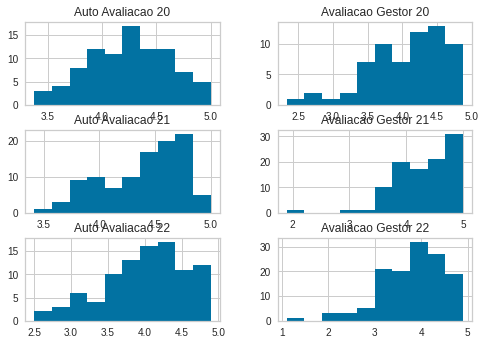

In [10]:
hist_thre = df_performance.hist()

O gráfico acima mostra a nota com mais frequência de todos os anos das avaliações do gestor e das autoavaliações. Podemos notar o ano de 2021 foi o ano com as maiores notas dos gestores e 2022 foi com as melhores métricas de autoavaliaçã.

### 2.2.4 Tabela "Horas Extras"

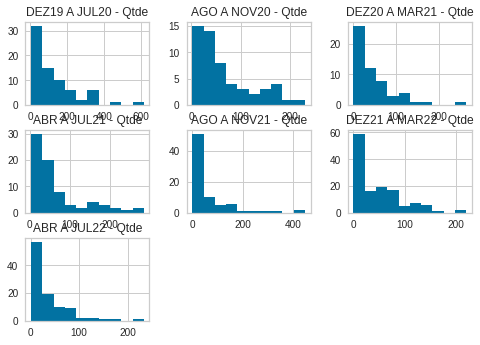

In [11]:
hist_four = pd.DataFrame()
hist_four = pd.concat([hist_four ,df_horas['DEZ19 A JUL20 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['AGO A NOV20 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['DEZ20 A MAR21 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['ABR A JUL21 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['AGO A NOV21 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['DEZ21 A MAR22 - Qtde']], axis = 1)
hist_four = pd.concat([hist_four ,df_horas['ABR A JUL22 - Qtde']], axis = 1)



hist_four = hist_four.hist()

O gráfico acima mostra a quantidade horas extras feitas mais comuns entre os colaboradores, podemos concluir que em todos os intevalos de meses, os números de horas extras feitas sempre estão no intervalo de 0 a 100, sendo sua grande maioria entre 0 e 10 horas extras, ou seja, não são muitos colaboradores que realizam horas extras.

#3.Preparação dos Dados (CRISP-DM)

A manipulação dos dados exige que eles estejam todos em formato de número (type: number) para fácil leitura e carregamento dos dados pelo algoritmo, os dados disponibilizados precisam ser passados por uma etapa de preparação. Essa etapa inclui tarefas de classificação e formatação de dados para modelagem, remover ou substituir registros em branco, seleção de um subconjunto de amostras para análise, derivação de novos atributos e mesclar conjuntos de dados e registros.

## 3.1 Remover ou substituir registros em branco

Em nosso modelo preditivo ter registros em brancos prejudica a análise do algoritmo, tendo isso em vista, detectamos que algumas colunas da aba “Everymind” e “Ambiente de Trabalho 27.07” haviam dados vazios e precisariam ser preenchidos. Essa Feature foi selecionada para os campos vazios na tabela não ocasionarem erros em nossa predição do algoritmo e prejudicar a confiabilidade das informações.

In [12]:
#------------------------------------Tabela Everymind--------------------------

# Verifica se dentro da coluna "Dt Saisa" tem cédulas vazias e caso tenha, adiciona a data de hoje.
df_saida = df_everymind['Dt Saida'].isnull()

for i in range(0,len(df_saida)):
  if df_saida[i] == True:
    df_everymind['Dt Saida'][i] = pd.Timestamp.today()

# Verifica se dentro da coluna "Tipo Saida" tem cédulas vazias e caso tenha, adciona "ColaboradorAtivo".

df_tipo_bool = df_everymind['Tipo Saida'].isnull()
df_tipo_aux = df_everymind['Tipo Saida']

for i in range(0,len(df_tipo_bool)):
  if df_tipo_bool[i] == True:
    df_tipo_bool[i] = "ColaboradorAtivo"
  if df_tipo_bool[i] == False: 
    df_tipo_bool[i] = (df_tipo_aux[i])

df_everymind['Tipo Saida'] = df_tipo_bool

#------------------------------------Tabela Ambiente de trabalho--------------------------

# Verifica se dentro das colunas de porcentagem de satisfação tem cédulas vazias e caso tenha, adiciona o 0.
keywords = ['Pulou', 'Muito Insatisfeito', 'Insatisfeito', 'Neutro', 'Satisfeito', 'Muito Satisfeito']

for i in keywords:
  
  df_ambiente_satisfaction = df_ambiente[i].isnull()

  for j in range(0,len(df_ambiente_satisfaction)):
    if df_ambiente_satisfaction[j] == True:
      df_ambiente[i][j] = "0"


#------------------------------------Tabela Performance--------------------------

kayPerformance = ['Auto Avaliacao 20', 'Avaliacao Gestor 20', 'Auto Avaliacao 21', 'Avaliacao Gestor 21', 'Auto Avaliacao 22', 'Avaliacao Gestor 22']

for i in kayPerformance:

  df_performance_null = df_performance[i].isnull()

  for j in range(0, len(df_performance_null)):
    if df_performance_null[j] == True:
      df_performance[i][j] = 0

#------------------------------------Tabela Horas Extras--------------------------

kayHoras = ['DEZ19 A JUL20 - Qtde', 'DEZ19 A JUL20 - Valor', 'AGO A NOV20 - Qtde', 'AGO A NOV20 - Valor', 'DEZ20 A MAR21 - Qtde', 'DEZ20 A MAR21 - Valor', 'ABR A JUL21 - Qtde', 'ABR A JUL21 - Valor', 'AGO A NOV21 - Qtde', 'AGO A NOV21 - Valor', 'DEZ21 A MAR22 - Qtde', 'DEZ21 A MAR22 - Valor', 'ABR A JUL22 - Qtde', 'ABR A JUL22 - Valor']

for i in kayHoras:

  df_horas_null = df_horas[i].isnull()

  for j in range(0, len(df_horas_null)):
    if df_horas_null[j] == True:
      df_horas[i][j] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df_everymind['Dt Saida']

0     2022-10-07 01:59:11.323883
1     2022-10-07 01:59:11.325063
2     2022-10-07 01:59:11.325391
3     2022-10-07 01:59:11.325663
4     2022-10-07 01:59:11.325919
                 ...            
470   2021-09-03 00:00:00.000000
471   2021-11-12 00:00:00.000000
472   2020-02-21 00:00:00.000000
473   2020-07-15 00:00:00.000000
474   2020-12-11 00:00:00.000000
Name: Dt Saida, Length: 475, dtype: datetime64[ns]

## 3.2 Classificação e formatação de dados para modelagem

Nesta seção, vamos tratar os dados a fim de padronizá-los para que sejam aceitos e melhor utilizados pelo algoritmo a partir de funções que modificam a forma do dado. No momento, estamos trabalhando com alguns tipos de dados, sendo eles:


*   Dados relacionadas a tempo e numeros
*   Dados relaciondados a nome

### 3.2.1 Dados relacionadas a tempo e numeros

As manipulações para dados do tipo data envolvem a conversão do formato para o padrão "YYYY-MM-DD" (Ex: 2020-09-14) e a inclusão de valores em cédulas vazias para efeitos de cálculo (Na coluna "Dt Saida", quando não consta a data de saída, atribuimos o dia atual para podermos calcular o número de dias na empresa). Sofrem essa alteração os dados presentes nas colunas "Dt Admissao", "Dt Nascimento" e "Dt Saida".

As manipulações dos dados das respostas da pesquisa de ambiente de trabalho da ultima tabela apenas inclui a remoção do "%" para o dado ser apenas numerico.

As transformações seguem abaixo:

In [14]:
#------------------------------------Tabela Everymind--------------------------

# Formata a data de admissao no formato ano/mes/dia
for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]) .replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

df_everymind['Dt Admissao'] = pd.to_datetime(df_everymind['Dt Admissao'], format="%Y/%m/%d")

# Formata a data de nascimento no formato ano/mes/dia

for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")
  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")

df_everymind['Dt Nascimento'] = pd.to_datetime(df_everymind['Dt Nascimento'], format="%Y/%m/%d")


# Formata a data de saída, sendo que se o valor for vazio, atribui a data atual como data de saída

df_everymind['Dt Saida'] = pd.to_datetime(df_everymind['Dt Saida'], format="%Y/%m/%d")

#------------------------------------Tabela Reconhecimento--------------------------

# Coloca a coluna "Data de Admissao" no formato ano/mes/dia

for i in range(0, len(df_reconhecimento['Data de Admissão'])):

  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('00:00:00', '')
  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('/', '-')
  df_reconhecimento['Data de Admissão'][i] = moment.date(df_reconhecimento['Data de Admissão'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data de Admissão'] = pd.to_datetime(df_reconhecimento['Data de Admissão'], format="%Y/%m/%d")

# Formata a data de Vigência no formato ano/mes/dia
for i in range(0, len(df_reconhecimento['Data Vigência'])):
  
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('00:00:00', '')
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('/', '-')
  df_reconhecimento['Data Vigência'][i] = moment.date(df_reconhecimento['Data Vigência'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data Vigência'] = pd.to_datetime(df_reconhecimento['Data Vigência'], format="%Y/%m/%d")


#------------------------------------Tabela Ambiente de trabalho--------------------------


for i in keywords:
  for j in range(0,len(df_ambiente[i])):
    df_ambiente[i][j] = df_ambiente[i][j].replace('%', '')
  df_ambiente[i] = df_ambiente[i].astype(float)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [15]:
df_everymind['Dt Saida']

0     2022-10-07 01:59:11.323883
1     2022-10-07 01:59:11.325063
2     2022-10-07 01:59:11.325391
3     2022-10-07 01:59:11.325663
4     2022-10-07 01:59:11.325919
                 ...            
470   2021-09-03 00:00:00.000000
471   2021-11-12 00:00:00.000000
472   2020-02-21 00:00:00.000000
473   2020-07-15 00:00:00.000000
474   2020-12-11 00:00:00.000000
Name: Dt Saida, Length: 475, dtype: datetime64[ns]

### 3.2.2 Variáveis relacionadas a nomes

Para que o programa funcione corretamente, todos os dados que contêm nomes e/ou informações baseadas em texto foram padronizados removendo todos os espaços em branco (Exemplo: "Funcional Pl" vira "FuncionalPl").

foram formatados os textos com o objetivo de permanecer apenas os números. Exemplo: “PessoaColaboradora197” foi formatado para apenas “197”. Sofrem essa alteração os dados presentes na aba “Everymind”  nas coluna “Nome Completo” e na aba “Reconhecimento” na coluna “Codinome”.

As transformações seguem abaixo:

In [16]:
# ------------------------------------Tabela Everymind--------------------------


# Pega todas as colunas do dataframe com type "object" e tira todos os espaços em branco
dtg = df_everymind.select_dtypes(include = "object").columns

for j in dtg:
  df_everymind[j] = df_everymind[j].str.replace(' ', '')

for i in df_everymind:
  df_everymind[j] = df_everymind[j].str.replace('-', '')
# Cria uma coluna nova

df_everymind['PessoaColaboradora'] = ""

# Pega a coluna "Nome completo" tira o texto, deixa apenas o número do colaborador e adiciona na coluna criada "PessoaColaboradora" 

for i in range(0, len(df_everymind['Nome Completo'])):
  df_everymind['PessoaColaboradora'][i] = str(df_everymind['Nome Completo'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Reconhecimento--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_reconhecimento_types = df_reconhecimento.select_dtypes(include = "object").columns

for j in df_reconhecimento_types:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace(' ', '')

for i in df_reconhecimento:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace('-', '')

# Cria uma nova coluna "Pessoa colaboradora"
df_reconhecimento['PessoaColaboradora'] = ""

# Transforma a coluna "Codinome" em number, tirando os textos e colocando o numero do colaborador na coluna "PessoaColaboradora"
for i in range(0, len(df_reconhecimento['Codinome'])):
  df_reconhecimento['PessoaColaboradora'][i] = str(df_reconhecimento['Codinome'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Ambiente de Trabalho 27.07--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_ambiente_types = df_ambiente.select_dtypes(include = "object").columns

for j in df_ambiente_types:
  df_ambiente[j] = df_ambiente[j].str.replace(' ', '')

for i in df_ambiente:
  df_ambiente[j] = df_ambiente[j].str.replace('-', '')


# ------------------------------------Tabela Performance--------------------------

df_performance_types = df_performance.select_dtypes(include = "object").columns

for j in df_performance_types:
  df_performance[j] = df_performance[j].str.replace(' ', '')

for i in range(0, len(df_performance['Codinome'])):
  df_performance['Codinome'][i] = str(df_performance['Codinome'][i]).replace('PessoaColaboradora', '')



# ------------------------------------Tabela Horas Extras--------------------------

df_horas_types = df_horas.select_dtypes(include = "object").columns

for j in df_horas_types:
  df_horas[j] = df_horas[j].str.replace(' ', '')

for i in range(0, len(df_horas['Codinome'])):
  df_horas['Codinome'][i] = str(df_horas['Codinome'][i]).replace('PessoaColaboradora', '')



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.3 Derivação de novos atributos

A partir da limpeza dos dados e do relacionamento entre eles, conseguimos gerar novos elementos que facilitam as analises e auxiliam na tomada de decisões da IA. A partir dos dados obtidos, obtivemos os seguintes atributos:



*   Número de dias na empresa
*   Idade do colaborador
*   Média do tempo de reconhecimento (Também se aplica aos que tem mais de um reconhecimento).
*   Informação de trabalho remoto
*   Informação de saída ou permanência do colaborador na empresa





In [17]:
# ------------------------------------Tabela Everymind--------------------------

# Função que calcula os dias entre duas datas
def numOfDays(date1, date2):
    return (date2-date1).days

# Cria uma coluna de idade e uma de numero de dias na empresa na empresa 
df_everymind['Idade'] = 0
df_everymind['NumeroMeses'] = 0

# Faz o calculo da idade e armazena 
for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == str('ColaboradorAtivo'):
    if date.today().month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (date.today().year - (df_everymind['Dt Nascimento'][i]).year)-1
  else:
    if df_everymind['Dt Saida'][i].month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Nascimento'][i].year)-1

# Faz o calculo do numero de meses na empresa de cada colaborador

for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == str('Ativo'):
    df_everymind['NumeroMeses'][i] = (((date.today().year - df_everymind['Dt Admissao'][i].year)*12)+date.today().month - df_everymind['Dt Admissao'][i].month)
  else:
    df_everymind['NumeroMeses'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Admissao'][i].year)*12+df_everymind['Dt Saida'][i].month - df_everymind['Dt Admissao'][i].month
    
# ------------------------------------Tabela Reconhecimento--------------------------


#Cria uma coluna "DiasParaReconhecimento"
df_reconhecimento['DiasParaReconhecimento'] = 0

#Calcula os dias que o empregador entrou na empresa até receber reconhecimento
date_reconhecimento1 = df_reconhecimento['Data de Admissão']
date_reconhecimento2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date_reconhecimento2)):
  df_reconhecimento['DiasParaReconhecimento'][i] = str(numOfDays(date_reconhecimento1[i], date_reconhecimento2[i]))


# ------------------------------------Integração tabela Everymind e Reconhecimento--------------------------


# Cálculo do media do tempo para reconhecimento

df_reconhecimento['Espera de promoção'] = ""
df_everymind['mediaTempoPromoção'] = 0

date1 = df_reconhecimento['Data de Admissão']
date2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date2)):
  df_reconhecimento['Espera de promoção'][i] = str(numOfDays(date1[i], date2[i]))

arrayColab = df_reconhecimento['PessoaColaboradora'].unique()

wait_days_test = []
mean_time = []

for i in df_reconhecimento['PessoaColaboradora'].unique():
  wait_days_test.append(df_reconhecimento.loc[df_reconhecimento['PessoaColaboradora'] == i]['Espera de promoção'].values.tolist())
  wait_days_test[-1] = list(map(int, wait_days_test[-1]))

for i in range(0,len(wait_days_test)):
  wait_days_test[i] = np.sort(wait_days_test[i]).tolist()

for i in range(0, len(wait_days_test)):
  mean_time_calculation = 0
  for j in range(len(wait_days_test[i])-1, 0, -1):
    wait_days_test[i][j] = wait_days_test[i][j]-wait_days_test[i][j-1]
    mean_time_calculation += wait_days_test[i][j]
  mean_time.append(mean_time_calculation+wait_days_test[i][0]/len(wait_days_test[i]))

placeholder = df_reconhecimento['PessoaColaboradora'].unique()
for i in range (0, len(placeholder)):
  df_everymind.loc[df_everymind.PessoaColaboradora == placeholder[i], 'mediaTempoPromoção'] = mean_time[i]
# for i in range (0, len(df_everymind['mediaTempoPromoção'])):
#   print(str(df_everymind["PessoaColaboradora"][i]) + " " + str(df_everymind['mediaTempoPromoção'][i]))


# Criação da coluna que mostra a informação de saída ou permanência do colaborador na empresa

df_everymind['Saiu'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Saiu'][i] = 0
  else:
    df_everymind['Saiu'][i] = 1

# Criação da coluna que mostra a informação de trabalho remoto

df_everymind['Remoto'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Cidade'][i] != "SãoPaulo" and df_everymind['Estado'][i] != "SP":
    df_everymind['Remoto'][i] = 1
  else:
    df_everymind['Remoto'][i] = 0

# Criação da coluna que mostra a informação do colaborador ser ou não dev

columAux = df_everymind["Cargo"]
df_everymind['DEV'] = 0

for i in range(0, len(df_everymind["Cargo"])):
  df_everymind["Cargo"][i] = df_everymind["Cargo"][i].upper()
  if df_everymind["Cargo"][i].find('DEV') != -1:
    df_everymind['DEV'][i] = 1
  else:
    df_everymind['DEV'][i] = 0


# Criação da coluna que mostra a informação do colaborador estar ou não estar acima da faixa salarial
df_everymind['mediaSalarial'] = 0

for i in range (0, len(df_everymind['Salario Mês'])):
  if df_everymind['Salario Mês'][i] >= df_everymind['Salario Mês'].mean():
    df_everymind['mediaSalarial'][i] = 1
  else:
    df_everymind['mediaSalarial'][i] = 0


# ------------------------------------Tabela Performance--------------------------

# Integração com a tabela de performance, greração dos dados de médias das duas avaliações e número de avaliações

df_performance['autoAvali'] = float(0)
df_performance['gestoAvali'] = float(0)
df_performance['numAutoAva'] = 0
df_performance['numGestoAva'] = 0

df_everymind['AutoAvaEverymind'] = float(0)
df_everymind['GestoAvaEverymind'] = float(0)
df_everymind['numAutoAvaEv'] = 0
df_everymind['numGestoAvaEv'] = 0

auxAutoAva = ['Auto Avaliacao 20', 'Auto Avaliacao 21', 'Auto Avaliacao 22']
auxGestAva = ['Avaliacao Gestor 20', 'Avaliacao Gestor 21', 'Avaliacao Gestor 22']

for i in range(0, len(df_performance)):
  df_performance['autoAvali'][i] = float((df_performance['Auto Avaliacao 20'][i] + df_performance['Auto Avaliacao 21'][i] + df_performance['Auto Avaliacao 22'][i]) / 3)
  df_performance['gestoAvali'][i] = float((df_performance['Avaliacao Gestor 20'][i] + df_performance['Avaliacao Gestor 21'][i] + df_performance['Avaliacao Gestor 22'][i]) / 3)

  for j in auxAutoAva:
    if df_performance[j][i] != 0:
      df_performance['numAutoAva'][i] += 1

  for x in auxGestAva:
    if df_performance[x][i] != 0:
      df_performance['numGestoAva'][i] += 1

  df_everymind.loc[df_everymind.PessoaColaboradora == df_performance['Codinome'][i], 'AutoAvaEverymind'] = df_performance['autoAvali'][i]
  df_everymind.loc[df_everymind.PessoaColaboradora == df_performance['Codinome'][i], 'GestoAvaEverymind'] = df_performance['gestoAvali'][i]
  df_everymind.loc[df_everymind.PessoaColaboradora == df_performance['Codinome'][i], 'numAutoAvaEv'] = df_performance['numAutoAva'][i]
  df_everymind.loc[df_everymind.PessoaColaboradora == df_performance['Codinome'][i], 'numGestoAvaEv'] = df_performance['numGestoAva'][i]


# ------------------------------------Tabela Horas Extras--------------------------
# Integração com a tabela de performance, gerando o número total de horas extras e total de recebidos por isso

df_horas['qtndHoras'] = float(0)
df_horas['ValorHoras'] = float(0)

df_everymind['qtndHorasEver'] = float(0)
df_everymind['ValorHorasEver'] = float(0)

for i in range(0, len(df_horas)):
  df_horas['qtndHoras'][i] = float(df_horas['DEZ19 A JUL20 - Qtde'][i] + df_horas['AGO A NOV20 - Qtde'][i] + df_horas['DEZ20 A MAR21 - Qtde'][i] + df_horas['ABR A JUL21 - Qtde'][i] + df_horas['AGO A NOV21 - Qtde'][i] + df_horas['DEZ21 A MAR22 - Qtde'][i] + df_horas['ABR A JUL22 - Qtde'][i])
  df_horas['ValorHoras'][i] = float(df_horas['DEZ19 A JUL20 - Valor'][i] + df_horas['AGO A NOV20 - Valor'][i] + df_horas['DEZ20 A MAR21 - Valor'][i] + df_horas['ABR A JUL21 - Valor'][i] + df_horas['AGO A NOV21 - Valor'][i] + df_horas['DEZ21 A MAR22 - Valor'][i] + df_horas['ABR A JUL22 - Valor'][i])
  print(df_horas['qtndHoras'][i])

  df_everymind.loc[df_everymind.PessoaColaboradora == df_horas['Codinome'][i], 'qtndHorasEver'] = df_horas['qtndHoras'][i]
  df_everymind.loc[df_everymind.PessoaColaboradora == df_horas['Codinome'][i], 'ValorHorasEver'] = df_horas['ValorHoras'][i]


# ------------------------------------Integração 1 e 3 tabela--------------------------

df_everymind['notaArea'] = float(0)

arrayAreas = ['CPG&RetailI', 'Vendas', 'PS', 'Infraestrutura', 'Integration',
       'Commerce', 'BPM', 'Core&IndustriasII', 'Analytics', 'People',
       'Core&IndustriasI', 'CPG&RetailII', 'AgenciaDigital', 'AMS',
       'MktCloud', 'CPG&Retail', 'Education', 'Financeiro', 'Diretoria',
       'BestMinds', 'Produtos', 'Core&Industrias', 'BAC']

arrayNotas = [9.40, 8.46, 8.29, 8.75, 8.83,
              8.71, 8.75, 8.87, 8.83, 8.95,
              8.53, 8.51, 8.66, 8.29,
              8.66, 8.95, 8.75, 8.75, 8.75,
              8.75, 8.75, 8.7, 8.75]

for i in range(0, len(df_everymind['notaArea'])):
    df_everymind['notaArea'][i] = arrayNotas[arrayAreas.index(df_everymind['Area'][i])]


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

0.0
0.0
0.0
10.0
0.0
70.4
79.09999999999997
0.0
171.42000000000002
3.0
0.0
19.53
0.0
622.1
174.4
33.4
4.0
0.0
11.0
71.6
18.2
227.52
13.5
103.96000000000001
10.4
4.2
0.0
8.0
59.7
285.40000000000003
0.0
0.0
96.2
0.0
0.5
19.2
0.0
476.93
941.5
13.5
0.0
683.4
0.0
0.0
292.6
0.0
0.0
257.9
0.0
0.0
0.0
24.4
10.0
0.0
0.0
0.0
0.0
0.0
0.0
318.9
202.20000000000002
73.09
0.0
16.0
30.799999999999997
0.0
88.50999999999999
80.18
0.0
0.0
434.8
0.0
0.0
32.0
0.0
0.0
0.0
150.62
0.0
0.0
14.43
0.0
0.0
0.0
99.0
0.0
0.0
0.0
0.0
0.0
0.0
1140.1
71.7
21.0
0.0
7.0
0.0
400.62
0.0
12.0
321.01
0.0
93.8
0.0
0.0
386.15
0.0
138.77
14.0
4.42
0.0
0.0
228.12000000000003
0.0
5.5
278.8400000000001
39.0
182.12
17.0
23.3
0.0
840.4000000000001
0.0
0.0
215.1
0.0
415.26
0.0
0.0
3.0
0.0
15.0
0.0
98.12
0.0
0.0
68.52000000000001
0.0
0.0
0.0
8.0
0.0
0.0
0.0
8.0
270.12
0.0
150.6
0.0
23.1
0.0
33.0
0.0
0.0
0.0
0.0
18.0
120.0
0.0
0.0
78.9
334.6
0.0
20.8
12.459999999999999
0.0
213.48
0.0
76.92
0.0
469.5
53.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
69


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
df_everymind['Dt Saida']

0     2022-10-07 01:59:11.323883
1     2022-10-07 01:59:11.325063
2     2022-10-07 01:59:11.325391
3     2022-10-07 01:59:11.325663
4     2022-10-07 01:59:11.325919
                 ...            
470   2021-09-03 00:00:00.000000
471   2021-11-12 00:00:00.000000
472   2020-02-21 00:00:00.000000
473   2020-07-15 00:00:00.000000
474   2020-12-11 00:00:00.000000
Name: Dt Saida, Length: 475, dtype: datetime64[ns]

## 3.4 Encoders

Grande parte dos dados são categóricos e quando temos categorias como descrição do dado precisamos converter para valores numéricos (tipo int e float). Existem duas maneiras de se fazer o "encoding", sendo elas:
*   Label Encoding
*   One Hot Encoding



### 3.4.1 Label Encoding

O Label Encoding transforma as features em números ordenados, ou seja, em ordem. É normalmente usada quando uma feature é mais importante que outra. No projeto a única que identificamos que possui ordem é a escolaridade (na tabela Everymind).

In [19]:
# Cria um novo Data Frame para a coluna de Escolaridade e raliza o processo de Label Encoding
data_frame_esco = pd.DataFrame(df_everymind, columns=["Escolaridade "]) 
df_esco_atual = data_frame_esco.replace(['EnsinoMédioIncompleto',
                                         'EnsinoMédio', 
                                         'Técnico', 
                                         'Superiorincompleto', 
                                         'Graduação', 
                                         'PósGraduação', 
                                         'Mestrado'], 
                                         [0,1,2,3,4,5,6])

### 3.4.2 One Hot Encoding

O One Hot Encoding cria uma coluna para cada valor e faz uma atribuição do valor 1 (um) para a coluna correspondente da amostra e 0 (zero) para as outras. Dessa forma, uma linha tem apenas um valor. Essa forma de encoding costuma ser mais utilizada, pois não atribui uma ordem às features. Nós usamos o One Hot Encoding em todas as tabelas.

In [20]:
# ------------------------------------Tabela Everymind--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada. 
one_hot_cargos = pd.get_dummies(df_everymind["Cargo"])
one_hot_saida = pd.get_dummies(df_everymind["Tipo Saida"])
one_hot_genero = pd.get_dummies(df_everymind["Genero"])
one_hot_etnia = pd.get_dummies(df_everymind["Etnia"])
one_hot_civil = pd.get_dummies(df_everymind["Estado Civil"]) 
one_hot_estado = pd.get_dummies(df_everymind["Estado"])
one_hot_cidade = pd.get_dummies(df_everymind["Cidade"])
one_hot_area = pd.get_dummies(df_everymind["Area"])
one_hot_colaborador = pd.get_dummies(df_everymind["PessoaColaboradora"])


# ------------------------------------Tabela Reconhecimento--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada. 
one_hot_codinome = pd.get_dummies(df_reconhecimento["Codinome"])
one_hot_situacao = pd.get_dummies(df_reconhecimento["Situação"])
one_hot_novocargo = pd.get_dummies(df_reconhecimento["Novo Cargo"])
one_hot_motivo = pd.get_dummies(df_reconhecimento["Motivo"])
one_hot_funcao = pd.get_dummies(df_reconhecimento["Alterou Função"])

# ------------------------------------Tabela Ambiente de trabalho--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada.
one_hot_div = pd.get_dummies(df_ambiente["Divisao"])
one_hot_pilar = pd.get_dummies(df_ambiente["Pilar"])
one_hot_factor = pd.get_dummies(df_ambiente["Fator"])
one_hot_question = pd.get_dummies(df_ambiente["Pergunta"])
one_hot_reliabilityRate = pd.get_dummies(df_ambiente["Taxa de Confiabilidade"])

## 3.5 Colunas não utilizadas

Nesta etapa foi feita uma seleção dos dados e definição da relevância do atributo no nosso modelo, um atributo observado foi a questão da etnia, usar isso no modelo como fator decisivo é antiético, cria um viés negativo, deixa o modelo questionável com nível baixo de credibilidade e tira a viabilidade da solução, pensando nisso foi restringido da análise a coluna contendo a etnia dos colaboradores já que não tem validade para o resultado e não faz sentido para o negócio.

In [21]:
df_everymind = df_everymind.drop(columns=['Etnia'])

## 3.6 Mesclar conjuntos de dados e registros

Ao fim da formatação, categorização e padronização do banco de dados, todas as informações foram transferidos para uma nova tabela em que o algoritmo poderá trabalhar com ela no backend e que facilita a verificação e análise dos novos dados. Foi criada uma nova tabela correspondente para cada aba da base de dados.

### 3.6.1 Armazenando os dados em variaveis

In [22]:
# ------------------------------------Tabela Everymind--------------------------

age = df_everymind['Idade']
companyTime = df_everymind['NumeroMeses']
monthlySalary = df_everymind['Salario Mês']

# ------------------------------------Tabela Reconhecimento--------------------------

registrationRecognition = df_reconhecimento['Matricula']
registrationRecognition = df_reconhecimento['PessoaColaboradora']
daysRecognition = df_reconhecimento['DiasParaReconhecimento']
newSalary =  df_reconhecimento['Novo Salario']

# ------------------------------------Tabela Ambiente de trabalho--------------------------

punctuation = df_ambiente['Pontuação']
subpunctuation = df_ambiente['Pontuação.1']
searchSkip = df_ambiente['Pulou']
veryUnsatisfied = df_ambiente['Muito Insatisfeito']
unsatisfied = df_ambiente['Insatisfeito']
neutral = df_ambiente['Neutro']
satisfied = df_ambiente['Satisfeito']
verySatisfied = df_ambiente['Muito Satisfeito']

### 3.6.2 Concatenando os dados na nova tabela

In [23]:
# ------------------------------------Tabela Everymind--------------------------

# Cria uma tabela nova com os dados formatados
newData = pd.DataFrame()
newData = pd.concat([newData,age], axis = 1)
newData = pd.concat([newData,companyTime], axis = 1)
newData = pd.concat([newData,one_hot_cargos], axis = 1)
newData = pd.concat([newData,monthlySalary], axis = 1)
newData = pd.concat([newData,one_hot_genero], axis = 1)
newData = pd.concat([newData,one_hot_civil], axis = 1)
newData = pd.concat([newData,df_esco_atual], axis = 1)
newData = pd.concat([newData,one_hot_estado], axis = 1)
newData = pd.concat([newData,one_hot_cidade], axis = 1)
newData = pd.concat([newData,one_hot_area], axis = 1)

# ------------------------------------Tabela Reconhecimento--------------------------

# Cria uma tabela nova com os dados formatados
newData_reconhecimento = pd.DataFrame()
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_codinome], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_situacao], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_novocargo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_motivo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_funcao], axis = 1)


# ------------------------------------Tabela Ambiente de trabalho--------------------------

# Cria uma tabela nova com os dados formatados
newData_ambiente = pd.DataFrame()
newData_ambiente = pd.concat([newData_ambiente,one_hot_div], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_pilar], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,punctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_factor], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,subpunctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_question], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,searchSkip], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,veryUnsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,unsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,neutral], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,satisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,verySatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_reliabilityRate], axis = 1)

### 3.6.3 Download das novas tabelas

In [24]:
# newData.to_excel('formatData_Everymind.xlsx')
# newData_reconhecimento.to_excel('formatData_Reconhecimento.xlsx')
# newData_ambiente.to_excel('formatData_Ambiente.xlsx')

## 3.7 Matriz de correlação

### 3.7.1 Tabela "Everymind"

In [25]:
newData_corr = newData.corr()
newData_corr

,Idade,NumeroMeses,ARQUITETO,ARQUITETOSR,ASSISTENTEI,ASSISTENTEII,AUXILIARDELIMPEZA,COMERCIALIS,COMERCIALPL,CONSULTOR,...,Diretoria,Education,Financeiro,Infraestrutura,Integration,MktCloud,PS,People,Produtos,Vendas
Idade,1.000000,0.131643,0.103137,0.026489,-0.047280,-0.024538,0.117601,-0.007481,0.055060,0.131753,...,-0.024538,0.013331,0.092279,0.003890,-0.073591,-0.014516,-0.014628,-0.024546,-0.040099,0.181949
NumeroMeses,0.131643,1.000000,0.103015,0.075291,-0.021327,0.039334,0.068451,-0.018901,-0.016474,0.061253,...,0.039334,0.069676,0.319563,-0.023753,-0.070013,0.010486,-0.059024,-0.004164,-0.077206,-0.046136
ARQUITETO,0.103137,0.103015,1.000000,-0.012275,-0.007072,-0.007072,-0.007072,-0.007072,-0.007072,-0.012275,...,-0.007072,-0.012275,-0.012275,-0.007072,0.162422,0.055929,0.040001,-0.021398,-0.025828,-0.030557
ARQUITETOSR,0.026489,0.075291,-0.012275,1.000000,-0.003662,-0.003662,-0.003662,-0.003662,-0.003662,-0.006356,...,-0.003662,0.329096,-0.006356,-0.003662,-0.012275,-0.013893,-0.016274,-0.011079,-0.013373,-0.015822
ASSISTENTEI,-0.047280,-0.021327,-0.007072,-0.003662,1.000000,-0.002110,-0.002110,-0.002110,-0.002110,-0.003662,...,-0.002110,-0.003662,-0.003662,-0.002110,-0.007072,-0.008004,-0.009376,-0.006383,-0.007705,0.231437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MktCloud,-0.014516,0.010486,0.055929,-0.013893,-0.008004,-0.008004,-0.008004,-0.008004,-0.008004,-0.013893,...,-0.008004,-0.013893,-0.013893,-0.008004,-0.026832,1.000000,-0.035572,-0.024218,-0.029232,-0.034585
PS,-0.014628,-0.059024,0.040001,-0.016274,-0.009376,-0.009376,-0.009376,-0.009376,-0.009376,0.119340,...,-0.009376,-0.016274,-0.016274,-0.009376,-0.031429,-0.035572,1.000000,-0.028368,-0.034241,-0.040511
People,-0.024546,-0.004164,-0.021398,-0.011079,-0.006383,-0.006383,-0.006383,-0.006383,-0.006383,-0.011079,...,-0.006383,-0.011079,-0.011079,-0.006383,-0.021398,-0.024218,-0.028368,1.000000,-0.023312,-0.027581
Produtos,-0.040099,-0.077206,-0.025828,-0.013373,-0.007705,-0.007705,-0.007705,-0.007705,-0.007705,-0.013373,...,-0.007705,-0.013373,-0.013373,-0.007705,-0.025828,-0.029232,-0.034241,-0.023312,1.000000,-0.033291


### 3.7.2 Tabela "Reconhecimento"

In [26]:
newData_reconhecimento_corr = newData_reconhecimento.corr()
newData_reconhecimento_corr

,PessoaColaboradora10,PessoaColaboradora101,PessoaColaboradora103,PessoaColaboradora106,PessoaColaboradora108,PessoaColaboradora113,PessoaColaboradora115,PessoaColaboradora116,PessoaColaboradora117,PessoaColaboradora118,...,LiderIS,PVSr,PessoasPl,SMJr,Trainee-Dev,MÉRITO,PROMOÇÃO,RECLASSIFCARGO,Não,Sim
PessoaColaboradora10,1.000000,-0.005140,-0.004190,-0.005140,-0.005140,-0.002959,-0.002959,-0.002959,-0.002959,-0.004190,...,-0.002959,-0.002959,-0.005944,-0.004190,-0.002959,-0.051122,0.051425,-0.002959,-0.051122,0.051122
PessoaColaboradora101,-0.005140,1.000000,-0.007279,-0.008929,-0.008929,-0.005140,-0.005140,-0.005140,-0.005140,-0.007279,...,-0.005140,-0.005140,-0.010325,-0.007279,-0.005140,-0.025693,0.026242,-0.005140,-0.025693,0.025693
PessoaColaboradora103,-0.004190,-0.007279,1.000000,-0.007279,-0.007279,-0.004190,-0.004190,-0.004190,-0.004190,-0.005935,...,-0.004190,-0.004190,-0.008418,-0.005935,-0.004190,0.081967,-0.081483,-0.004190,0.081967,-0.081967
PessoaColaboradora106,-0.005140,-0.008929,-0.007279,1.000000,-0.008929,-0.005140,-0.005140,-0.005140,-0.005140,-0.007279,...,-0.005140,-0.005140,-0.010325,-0.007279,-0.005140,-0.025693,0.026242,-0.005140,-0.025693,0.025693
PessoaColaboradora108,-0.005140,-0.008929,-0.007279,-0.008929,1.000000,-0.005140,-0.005140,-0.005140,-0.005140,-0.007279,...,-0.005140,-0.005140,-0.010325,-0.007279,-0.005140,0.037422,-0.036851,-0.005140,0.037422,-0.037422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MÉRITO,-0.051122,-0.025693,0.081967,-0.025693,0.037422,-0.051122,0.057873,0.057873,-0.051122,-0.072404,...,-0.051122,0.057873,0.116264,0.004781,0.057873,1.000000,-0.994097,-0.051122,1.000000,-1.000000
PROMOÇÃO,0.051425,0.026242,-0.081483,0.026242,-0.036851,0.051425,-0.057532,-0.057532,0.051425,0.072834,...,0.051425,-0.057532,-0.115578,-0.004325,-0.057532,-0.994097,1.000000,-0.057532,-0.994097,0.994097
RECLASSIFCARGO,-0.002959,-0.005140,-0.004190,-0.005140,-0.005140,-0.002959,-0.002959,-0.002959,-0.002959,-0.004190,...,-0.002959,-0.002959,-0.005944,-0.004190,-0.002959,-0.051122,-0.057532,1.000000,-0.051122,0.051122
Não,-0.051122,-0.025693,0.081967,-0.025693,0.037422,-0.051122,0.057873,0.057873,-0.051122,-0.072404,...,-0.051122,0.057873,0.116264,0.004781,0.057873,1.000000,-0.994097,-0.051122,1.000000,-1.000000


### 3.7.3 Tabela "Ambiente"

In [27]:
newData_ambiente_corr = newData_ambiente.corr()
newData_ambiente_corr

,AMS&PS,Analytics&Integration,CPG&RetailI,CPG&RetailII,Commerce,Core&IndustriasI,Core&IndustriasII,Everymind,MktCloud,People&Culture,...,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Alto,Baixo,MuitoAlto,MuitoBaixo,Médio
AMS&PS,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,0.079633,0.038217,0.027881,0.124048,-0.089285,0.000972,0.034664,-0.020170,-0.001521,-0.039529
Analytics&Integration,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,-0.001399,0.057449,0.054899,0.058174,-0.026219,-0.031098,0.009523,-0.020170,0.011028,-0.003294
CPG&RetailI,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,-0.045773,-0.078075,-0.087034,-0.123736,0.142228,0.033042,-0.091040,0.063030,-0.051719,0.159763
CPG&RetailII,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,-0.003812,0.035893,0.036052,0.072019,-0.059942,-0.041788,-0.003047,-0.020170,0.048676,-0.033490
Commerce,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,0.017918,0.032807,-0.010015,0.001146,0.009280,0.043732,-0.036568,0.035297,-0.085184,0.135606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alto,0.000972,-0.031098,0.033042,-0.041788,0.043732,0.011662,0.022352,0.022352,-0.063168,0.022352,...,0.008184,-0.012648,0.031825,0.060672,0.088462,1.000000,-0.163380,-0.030259,-0.164789,-0.078377
Baixo,0.034664,0.009523,-0.091040,-0.003047,-0.036568,0.043044,0.009523,0.139416,-0.053329,-0.023998,...,0.084760,0.140056,0.095257,0.251164,0.338308,-0.163380,1.000000,-0.123898,-0.674736,-0.320917
MuitoAlto,-0.020170,-0.020170,0.063030,-0.020170,0.035297,-0.020170,0.035297,-0.020170,-0.020170,0.007564,...,-0.009092,-0.006492,-0.015000,-0.032515,0.135702,-0.030259,-0.123898,1.000000,-0.124966,-0.059436
MuitoBaixo,-0.001521,0.011028,-0.051719,0.048676,-0.085184,0.002662,-0.093550,-0.101916,0.149071,0.027761,...,-0.104476,-0.150891,-0.152636,-0.321155,-0.540504,-0.164789,-0.674736,-0.124966,1.000000,-0.323685


### 3.7.4 Tabela "Performance"

In [28]:
df_performance_copia = df_performance.copy()
df_performance_copia = df_performance_copia.drop(columns=['Codinome'])
perfor_corr = df_performance_copia.corr()
perfor_corr

,Auto Avaliacao 20,Avaliacao Gestor 20,Auto Avaliacao 21,Avaliacao Gestor 21,Auto Avaliacao 22,Avaliacao Gestor 22,autoAvali,gestoAvali,numAutoAva,numGestoAva
Auto Avaliacao 20,1.000000,0.737954,0.088828,0.237237,-0.286575,-0.363005,0.500005,0.355381,0.492777,0.323918
Avaliacao Gestor 20,0.737954,1.000000,0.136488,0.097476,-0.163392,-0.266133,0.442856,0.471001,0.443048,0.453163
Auto Avaliacao 21,0.088828,0.136488,1.000000,0.585792,0.006269,-0.122334,0.704564,0.398150,0.668930,0.381524
Avaliacao Gestor 21,0.237237,0.097476,0.585792,1.000000,-0.044707,-0.071750,0.497423,0.687919,0.465816,0.644035
Auto Avaliacao 22,-0.286575,-0.163392,0.006269,-0.044707,1.000000,0.421273,0.411579,0.139641,0.434922,0.154730
Avaliacao Gestor 22,-0.363005,-0.266133,-0.122334,-0.071750,0.421273,1.000000,-0.055086,0.424289,-0.035207,0.443721
autoAvali,0.500005,0.442856,0.704564,0.497423,0.411579,-0.055086,1.000000,0.555374,0.986138,0.534232
gestoAvali,0.355381,0.471001,0.398150,0.687919,0.139641,0.424289,0.555374,1.000000,0.546507,0.972240
numAutoAva,0.492777,0.443048,0.668930,0.465816,0.434922,-0.035207,0.986138,0.546507,1.000000,0.537463
numGestoAva,0.323918,0.453163,0.381524,0.644035,0.154730,0.443721,0.534232,0.972240,0.537463,1.000000


### 3.7.5 Tabelas "Horas extras"

In [29]:
df_horas_copia = df_horas.copy()
df_horas_copia = df_horas_copia.drop(columns=['Codinome'])
extras_corr = df_horas_copia.corr()
extras_corr

,DEZ19 A JUL20 - Qtde,DEZ19 A JUL20 - Valor,AGO A NOV20 - Qtde,AGO A NOV20 - Valor,DEZ20 A MAR21 - Qtde,DEZ20 A MAR21 - Valor,ABR A JUL21 - Qtde,ABR A JUL21 - Valor,AGO A NOV21 - Qtde,AGO A NOV21 - Valor,DEZ21 A MAR22 - Qtde,DEZ21 A MAR22 - Valor,ABR A JUL22 - Qtde,ABR A JUL22 - Valor,qtndHoras,ValorHoras
DEZ19 A JUL20 - Qtde,1.000000,0.922334,0.637293,0.643201,0.462160,0.450631,0.564214,0.592499,0.218245,0.248130,0.014020,0.046933,0.043867,0.064910,0.754704,0.708932
DEZ19 A JUL20 - Valor,0.922334,1.000000,0.640508,0.733496,0.449052,0.517815,0.544766,0.637842,0.118270,0.160947,-0.012565,0.020185,0.020477,0.044426,0.684285,0.739941
AGO A NOV20 - Qtde,0.637293,0.640508,1.000000,0.924828,0.438727,0.483599,0.538641,0.575537,0.123547,0.144715,0.078761,0.104763,0.082516,0.098021,0.661257,0.653504
AGO A NOV20 - Valor,0.643201,0.733496,0.924828,1.000000,0.482819,0.586634,0.572340,0.675723,0.087047,0.122999,0.013265,0.042003,0.041238,0.063231,0.635650,0.712197
DEZ20 A MAR21 - Qtde,0.462160,0.449052,0.438727,0.482819,1.000000,0.903123,0.713115,0.685145,0.299493,0.309238,0.131038,0.151592,0.089133,0.116619,0.667296,0.652035
DEZ20 A MAR21 - Valor,0.450631,0.517815,0.483599,0.586634,0.903123,1.000000,0.629154,0.710493,0.149584,0.168798,0.044171,0.069517,0.047419,0.074886,0.577006,0.653523
ABR A JUL21 - Qtde,0.564214,0.544766,0.538641,0.572340,0.713115,0.629154,1.000000,0.945610,0.539897,0.579939,0.237866,0.290022,0.234825,0.273611,0.851473,0.851013
ABR A JUL21 - Valor,0.592499,0.637842,0.575537,0.675723,0.685145,0.710493,0.945610,1.000000,0.441180,0.495756,0.137272,0.189453,0.160765,0.200580,0.797373,0.870094
AGO A NOV21 - Qtde,0.218245,0.118270,0.123547,0.087047,0.299493,0.149584,0.539897,0.441180,1.000000,0.972453,0.284215,0.323736,0.319736,0.343738,0.627701,0.552733
AGO A NOV21 - Valor,0.248130,0.160947,0.144715,0.122999,0.309238,0.168798,0.579939,0.495756,0.972453,1.000000,0.251997,0.314106,0.306039,0.346102,0.637706,0.594741


#4.Definição das Features

Após todo o processo de preparação dos dados é necessário concatenar os novos dados em um novo Database para ser utilizado no treinamento e teste dos modelos preditivos. Neste Database, definimos todas as features que entendemos como importantes para a predição dos resultados. As demonstrações que expõem a escolha destas serão posteriormente apresentadas estatisticamente na seção 6 deste notebook (SHAP).

Ao final desse processo, possuímos 475 amostras de dados com 17 atributos cada.


In [30]:

# Primeira definição de Features
features = pd.DataFrame()
features = pd.concat([features ,df_everymind['Idade']], axis = 1)
features = pd.concat([features ,df_everymind['NumeroMeses']], axis = 1)
features = pd.concat([features ,df_everymind['Salario Mês']], axis = 1)
features = pd.concat([features ,one_hot_cargos], axis = 1)
features = pd.concat([features ,one_hot_genero], axis = 1)
features = pd.concat([features ,one_hot_civil], axis = 1)
features = pd.concat([features ,one_hot_area], axis = 1)
features = pd.concat([features ,df_everymind['Remoto']], axis = 1)
features = pd.concat([features ,df_everymind['mediaTempoPromoção']], axis = 1)
features = pd.concat([features ,df_everymind['DEV']], axis = 1)
features = pd.concat([features ,df_everymind['AutoAvaEverymind']], axis = 1)
features = pd.concat([features ,df_everymind['numAutoAvaEv']], axis = 1)
features = pd.concat([features ,df_everymind['GestoAvaEverymind']], axis = 1)
features = pd.concat([features ,df_everymind['numGestoAvaEv']], axis = 1)
features = pd.concat([features ,df_everymind['qtndHorasEver']], axis = 1)
features = pd.concat([features ,df_everymind['ValorHorasEver']], axis = 1)
features = pd.concat([features ,df_everymind['notaArea']], axis = 1)

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 474
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Idade                  475 non-null    int64  
 1   NumeroMeses            475 non-null    int64  
 2   Salario Mês            475 non-null    float64
 3   ARQUITETO              475 non-null    uint8  
 4   ARQUITETOSR            475 non-null    uint8  
 5   ASSISTENTEI            475 non-null    uint8  
 6   ASSISTENTEII           475 non-null    uint8  
 7   AUXILIARDELIMPEZA      475 non-null    uint8  
 8   COMERCIALIS            475 non-null    uint8  
 9   COMERCIALPL            475 non-null    uint8  
 10  CONSULTOR              475 non-null    uint8  
 11  DEVESPECIALISTA        475 non-null    uint8  
 12  DEVJR                  475 non-null    uint8  
 13  DEVPL                  475 non-null    uint8  
 14  DEVSR                  475 non-null    uint8  
 15  DIRETOR    

#5.Modelagem (CRISP-DM)

Nessa seção iremos explicar o funcionamento de cada um dos algoritmos e os experimentos realizados com os algoritmos (treinamentos e testes), usando equações, tabelas e gráficos de visualização de dados. Os algoritmos utilizados estão listados a seguir:



*   K Nearest Neighbor
*   Naive Bayes
*   Árvore de decisão
*   RandomForest
*   Support Vector Machine
*   Regressão Logística

Em conjunto com os experimentos realizados também contém os resultados de cada algoritmo, com uma conclusão ao final.

## 5.1 K Nearest Neighbor

O KNN é um algoritmo não paramétrico, onde a estrutura do modelo será determinada pelo dataset utilizado, ou seja, o conjunto de dados será determinado de acordo com a distância dos “vizinhos” mais próximos. Este algoritmo também é conhecido como de aprendizado lento ou melhor dizendo, é um algoritmo com um tempo de resposta mais demorado quando comparado aos demais, que também utilizam aprendizado supervisionado. Além disso, utiliza várias métricas para o cálculo da distância entre N dimensões, como o caso das distâncias de Hamming, Mahalanobis e Minkowski, porém a que utilizamos é a distância Euclidiana.

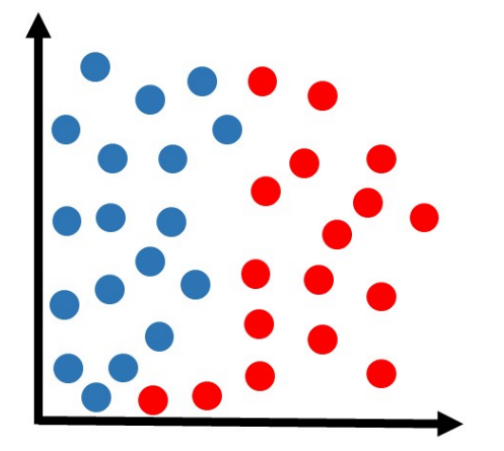

### 5.1.1 Aplicação do modelo

Foi aplicada a normalização (MinMaxScaler) pois a aplicação desse método auxiliou na melhora dos resultados.

In [32]:
# Dividindo x e y
x_knn = features
y_knn = df_everymind[['Saiu']]

# Dividindo dados para treino e dados para teste
x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

# Aplicação da normalização dos dados
scaler = MinMaxScaler()
x_knn_train = scaler.fit_transform(x_knn_train)
x_knn_test = scaler.transform(x_knn_test)

In [33]:
# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=9)
# Treino # x = Features, y = Label/Target
knn.fit( x_knn_train, y_knn_train.squeeze() ) # squeeze() -> df para series

# realizando predições com o conjunto de teste
y_knn_pred = knn.predict(x_knn_test)
# probabilidade de cada classe
y_knn_prob = knn.predict_proba(x_knn_test)

### 5.1.2 Criação de visualização da matriz de confusão

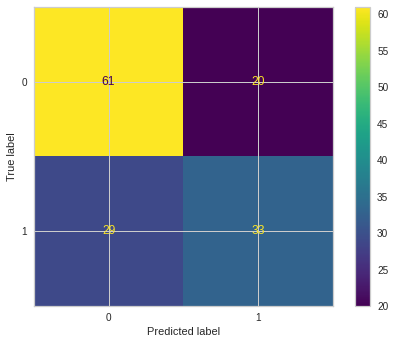

In [34]:
# Matriz de confusão
y_knn_true = y_knn_test

cm_knn = confusion_matrix(y_knn_true, y_knn_pred)

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()


### 5.1.3 Reporte das métricas de classificação

In [35]:
# Teste de Acuracidade (accuracy)
results_knn = (knn.score( x_knn_train, y_knn_train ), knn.score( x_knn_test, y_knn_test ))
print('Acuracidade (treino): ', knn.score( x_knn_train, y_knn_train ))
print('Acuracidade (teste): ', knn.score( x_knn_test, y_knn_test ))

# Report de classificação
print(classification_report(y_knn_test, y_knn_pred))

Acuracidade (treino):  0.7680722891566265
Acuracidade (teste):  0.6573426573426573
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        81
           1       0.62      0.53      0.57        62

    accuracy                           0.66       143
   macro avg       0.65      0.64      0.64       143
weighted avg       0.65      0.66      0.65       143



### 5.1.4 Aplicação e definição de hiperparâmetros

In [36]:
parameters_knn = {
      'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      'weights': ['uniform', 'distance'],
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
      'p': [1, 2],
      'metric': ['minkowski', 'euclidean', 'manhattan'],

  }

# defining parameter range
rdm = RandomizedSearchCV(knn, parameters_knn, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for randomized search
rdm_search=rdm.fit(x_knn_train, y_knn_train.squeeze())
y_pred_KNN = rdm.predict(x_knn_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### 5.1.5 Matriz de confusão e report de classificação

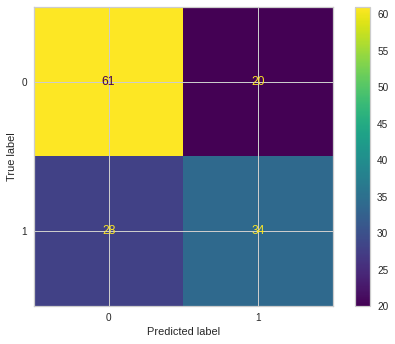

In [37]:
cm_KNN = confusion_matrix(y_knn_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN,
                              display_labels=rdm.classes_)
disp.plot()
plt.show()

In [38]:
results_knn_hparams = (rdm_search.best_score_, rdm.score(x_knn_test, y_knn_test))
print(rdm_search.best_params_)
print(classification_report(y_knn_test, y_pred_KNN))

{'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 60, 'algorithm': 'brute'}
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        81
           1       0.63      0.55      0.59        62

    accuracy                           0.66       143
   macro avg       0.66      0.65      0.65       143
weighted avg       0.66      0.66      0.66       143



### 5.1.6 Validação Cruzada

In [39]:
means_knn = cross_val_score(knn, x_knn, y_knn, cv=5)
c_validation_knn = means_knn.mean()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


### 5.1.7 Teste com diferentes "random_state"

In [40]:
for i in range(10,20):

  x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, 
                                                        test_size = 0.3, 
                                                        random_state = i)

    # Normalização dos dados

    # Instaciando o objeto scaler
  scaler = MinMaxScaler()

  x_knn_train = scaler.fit_transform(x_knn_train)

  x_knn_test = scaler.transform(x_knn_test)

    # Aplicação do modelo

    # Instaciação do obj Algoritmo
  knn = KNeighborsClassifier(n_neighbors=9)
    # Treino # x = Features, y = Label/Target
  knn.fit( x_knn_train, y_knn_train.squeeze() ) # squeeze() -> df para series


  y_knn_pred = knn.predict(x_knn_test)
    # probabilidade de cada classe

    # Teste de Acuracidade (accuracy)
  print(i)
  print('Acuracidade (treino): ', knn.score( x_knn_train, y_knn_train ))
  print('Acuracidade (teste): ', knn.score( x_knn_test, y_knn_test ))

10
Acuracidade (treino):  0.7620481927710844
Acuracidade (teste):  0.6853146853146853
11
Acuracidade (treino):  0.7379518072289156
Acuracidade (teste):  0.6643356643356644
12
Acuracidade (treino):  0.7680722891566265
Acuracidade (teste):  0.6853146853146853
13
Acuracidade (treino):  0.7740963855421686
Acuracidade (teste):  0.6153846153846154
14
Acuracidade (treino):  0.7259036144578314
Acuracidade (teste):  0.6993006993006993
15
Acuracidade (treino):  0.7439759036144579
Acuracidade (teste):  0.6783216783216783
16
Acuracidade (treino):  0.7710843373493976
Acuracidade (teste):  0.5804195804195804
17
Acuracidade (treino):  0.7620481927710844
Acuracidade (teste):  0.6293706293706294
18
Acuracidade (treino):  0.7650602409638554
Acuracidade (teste):  0.6363636363636364
19
Acuracidade (treino):  0.7319277108433735
Acuracidade (teste):  0.6363636363636364


## 5.2 Naive Bayes

Naive Bayes é um classificador probabilistico que é baseado no teorema de Bayes. Neste teorema, descrevemos a probabilidade de um evento acontecer dado que um outro, independente, já ocorreu. O classificador Naive Bayes assume que todos os valores das features são independentes entre si. Como exemplo, um veículo pode ser considerado um carro se possui 4 rodas, portas, um volante e motor. O classificador analisa a contribuição independente de cada uma dessas informações para tomar a decisão de classificá-lo como "Carro" ou "Não-Carro". A formula que sumariza o método é apresentada abaixo:


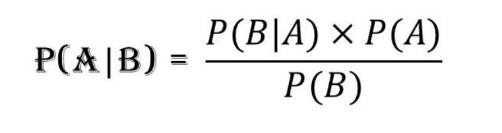

### 5.2.1 Aplicação do modelo

Foi aplicada a sobreamostragem (Oversampling) pois a aplicação desse método auxiliou na melhora dos resultados.

In [41]:
x_by = features
y_by = df_everymind[['Saiu']]

# Aplicação do oversampling
ros = RandomOverSampler(random_state=0)
x_by_resampled, y_by_resampled = ros.fit_resample(x_by, y_by)

# Dividimos entre tabela de treino e de teste

x_by_treino, x_by_teste, y_by_treino, y_by_teste = train_test_split(x_by_resampled, y_by_resampled, test_size = 0.3, random_state = 1)

# Analisamos o tamanho das tabelas criadas

x_by_teste.shape, y_by_teste.shape, x_by_treino.shape, y_by_treino.shape

# Instanciamos o GaussianNB, que possibilita a aplicação do Bayes, para uso na tabela de teste
naive_tipo_saida = GaussianNB()
naive_tipo_saida.fit(x_by_teste, y_by_teste)

previsoes = naive_tipo_saida.predict(x_by_teste)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### 5.2.2 Criação de visualização da matriz de confusão

In [42]:
# Fazemos a matriz de confusão
confusion_matrix(y_by_teste, previsoes)

array([[24, 57],
       [ 9, 81]])

X does not have valid feature names, but GaussianNB was fitted with feature names


0.6140350877192983

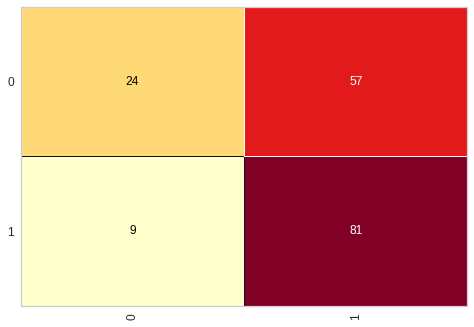

In [43]:
cm = ConfusionMatrix(naive_tipo_saida)
cm.fit(x_by_treino, y_by_treino)
cm.score(x_by_teste, y_by_teste)

# Usamos o yellowbrick classifier para ter uma matriz de confusão mais didática 

### 5.2.3 Reporte das métricas de classificação

In [44]:
# Cálculamos a acurácia
results_naive_bayes = (naive_tipo_saida.score(x_by_treino, y_by_treino), naive_tipo_saida.score(x_by_teste, y_by_teste)) 
print('Acuracidade (treino): ', naive_tipo_saida.score(x_by_treino, y_by_treino))
print('Acuracidade (teste): ', naive_tipo_saida.score(x_by_teste, y_by_teste))
accuracy_score(y_by_teste, previsoes)

print(classification_report(y_by_teste, previsoes))

Acuracidade (treino):  0.5566750629722922
Acuracidade (teste):  0.6140350877192983
              precision    recall  f1-score   support

           0       0.73      0.30      0.42        81
           1       0.59      0.90      0.71        90

    accuracy                           0.61       171
   macro avg       0.66      0.60      0.57       171
weighted avg       0.65      0.61      0.57       171



### 5.2.4 Aplicação e definição de hiperparâmetros

In [45]:
params_bayes = {
'var_smoothing': [0.000000007935,0.000000008,0.0000000085,0.000000009, 0.0000000009, 0.00000000009]
}

rand_search_b = RandomizedSearchCV(estimator = GaussianNB(), param_distributions=params_bayes)
rand_search_b.fit(x_by_treino, y_by_treino.squeeze())
rand_search_b.predict(x_by_teste)

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

###5.2.5 Matriz de consusão e report de classificação

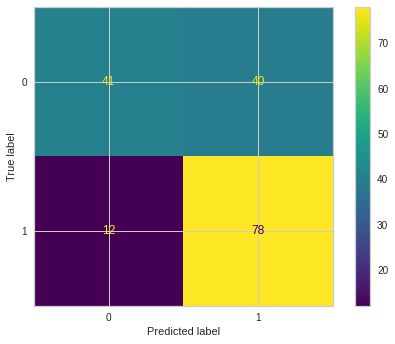

In [46]:
best_b = rand_search_b.best_estimator_
y_pred_b = best_b.predict(x_by_teste)

cm_BY = confusion_matrix(y_by_teste, y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_BY,
                              display_labels=rand_search_b.classes_)
disp.plot()
plt.show()

In [47]:
results_naive_bayes_hparams = (best_b.score(x_by_treino, y_by_treino ), best_b.score(x_by_teste, y_by_teste.squeeze() ))
print('Acc treino: ', best_b.score(x_by_treino, y_by_treino ))
print('Acc teste: ', best_b.score(x_by_teste, y_by_teste.squeeze() ))
print( 'Revocação: ', recall_score( y_by_teste, y_pred_b ))
print( 'Precisão: ', precision_score( y_by_teste, y_pred_b ))
print( 'F1_score: ', f1_score( y_by_teste, y_pred_b ))

Acc treino:  0.7355163727959698
Acc teste:  0.695906432748538
Revocação:  0.8666666666666667
Precisão:  0.6610169491525424
F1_score:  0.7500000000000001


###5.2.6 Validação Cruzada

In [48]:
means_nb = cross_val_score(naive_tipo_saida, x_by, y_by, cv=5)
means_nb.mean()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.5894736842105263

### 5.2.7 Teste com diferentes "random_state"

In [49]:
for i in range(10):
  x_by = features
  y_by = df_everymind[['Saiu']]

  ros = RandomOverSampler(random_state=0)

  x_by_resampled, y_by_resampled = ros.fit_resample(x_by, y_by)

  # Dividimos entre tabela de treino e de teste
  x_by_treino, x_by_teste, y_by_treino, y_by_teste = train_test_split(x_by_resampled, y_by_resampled, test_size = 0.3, random_state = i)

  scaler = MinMaxScaler()

  x_by_treino = scaler.fit_transform(x_by_treino)

  x_by_teste = scaler.transform(x_by_teste)

  naive_tipo_saida = GaussianNB()
  naive_tipo_saida.fit(x_by_teste, y_by_teste)

  previsoes = naive_tipo_saida.predict(x_by_teste)
  print(i)
  print(classification_report(y_by_teste, previsoes))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        77
           1       0.62      1.00      0.76        94

    accuracy                           0.66       171
   macro avg       0.81      0.62      0.58       171
weighted avg       0.79      0.66      0.60       171

1
              precision    recall  f1-score   support

           0       1.00      0.26      0.41        81
           1       0.60      1.00      0.75        90

    accuracy                           0.65       171
   macro avg       0.80      0.63      0.58       171
weighted avg       0.79      0.65      0.59       171

2
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        88
           1       0.57      1.00      0.73        83

    accuracy                           0.64       171
   macro avg       0.79      0.65      0.59       171
weighted avg       0.79      0.64      0.59       171

3


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.96      0.31      0.46        85
           1       0.59      0.99      0.74        86

    accuracy                           0.65       171
   macro avg       0.78      0.65      0.60       171
weighted avg       0.78      0.65      0.60       171

4
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        80
           1       0.60      1.00      0.75        91

    accuracy                           0.65       171
   macro avg       0.80      0.62      0.58       171
weighted avg       0.79      0.65      0.59       171

5
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        71
           1       0.67      1.00      0.80       100

    accuracy                           0.71       171
   macro avg       0.83      0.65      0.63       171
weighted avg       0.81      0.71      0.66       171

6
             

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


## 5.3 Árvore de decisão

A Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado para classificação e para regressão, o algoritmo divide as variáveis em ramos, esses ramos são calculados conforme a entropia ("confusão" dos dados) e ganho de informação de cada variável (baseado na importância da variável), também é aplicado uma hierarquia na relação desses ramos, existe o nó-raiz e o nós-folha sendo o nó-raiz um dos atributos da base de dados e os nós folhas a classe ou valor que será gerado como resposta.

Quando a árvore de decisão é gerada seus nós são criados com quatro atributos, sendo eles: o índice de Gini, também conhecido como impureza de Gini ou somente Gini, calcula a quantidade de probabilidade de um recurso específico que é classificado incorretamente quando selecionado aleatoriamente, os samples que são o número de amostras que correspondem a esse atributo, value que nos mostra a quantidade das duas classes é correspondente a aquele atributo e dependendo do value é gerado a classe correspondente final (de acordo com a maioria dos values).

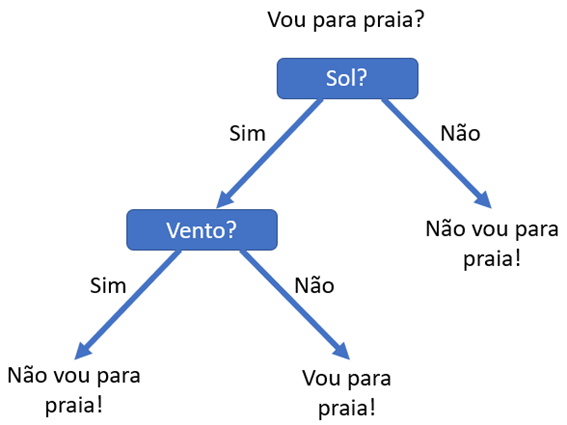





### 5.3.1 Aplicação do modelo

Nessa célula é feita a separação de treino e teste e aplica no modelo, e de saída retorna o tamanho das features (x) de treino e teste e a resposta target(y) de treino e teste. 

In [50]:
# Definindo X (Feaures utilizadas) e Y (Resposta de Saída ou Permanencia em SIM(1) ou NÃO(0))
x_tree = features
y_tree = df_everymind[['Saiu']]

# Separa treino e teste, definindo porcentagem de separação e random_state
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, 
                                                    test_size = 0.3, 
                                                     random_state = 72)

# Mostra os tamanhos do X e Y de treino e teste
print("Tamanho do X treino:", x_train_tree.shape)
print("Tamanho do Y treino:", y_train_tree.shape)
print("Tamanho do X teste:", x_test_tree.shape)
print("Tamanho do Y teste:", y_test_tree.shape)

# Rodando o modelo de Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train_tree, y_train_tree.squeeze())

# Armazenando em uma variavel as predições do resultado de teste
y_pred_tree = dt.predict(x_test_tree)

# Armazenando em uma variavel os resultados corretos do teste
y_true_tree = y_test_tree

Tamanho do X treino: (332, 79)
Tamanho do Y treino: (332, 1)
Tamanho do X teste: (143, 79)
Tamanho do Y teste: (143, 1)


### 5.3.2 Criação de visualização da matriz de confusão

'Matriz de confusão'

array([[70, 23],
       [18, 32]])

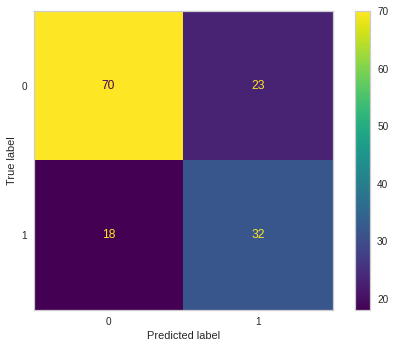

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f86245fd950>,
 None,
 None)

In [51]:
# Cria e mostra a matriz de confusão em forma de array
cm_tree = confusion_matrix(y_true_tree, y_pred_tree)
display("Matriz de confusão", cm_tree)

# Mostra a matriz de confusão em uma matriz de calor
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot(), plt.grid(False), plt.show()

#### 5.3.2.1 Comparação de treino e teste

In [52]:
# Mostrando as predições e os resultados corretos para comparação
print(y_pred_tree)
display(y_true_tree)

[0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


,Saiu
274,0
401,1
101,0
88,0
6,0
...,...
111,0
145,0
243,0
269,0


#### 5.3.2.1 Criação visual da árvore de decisão

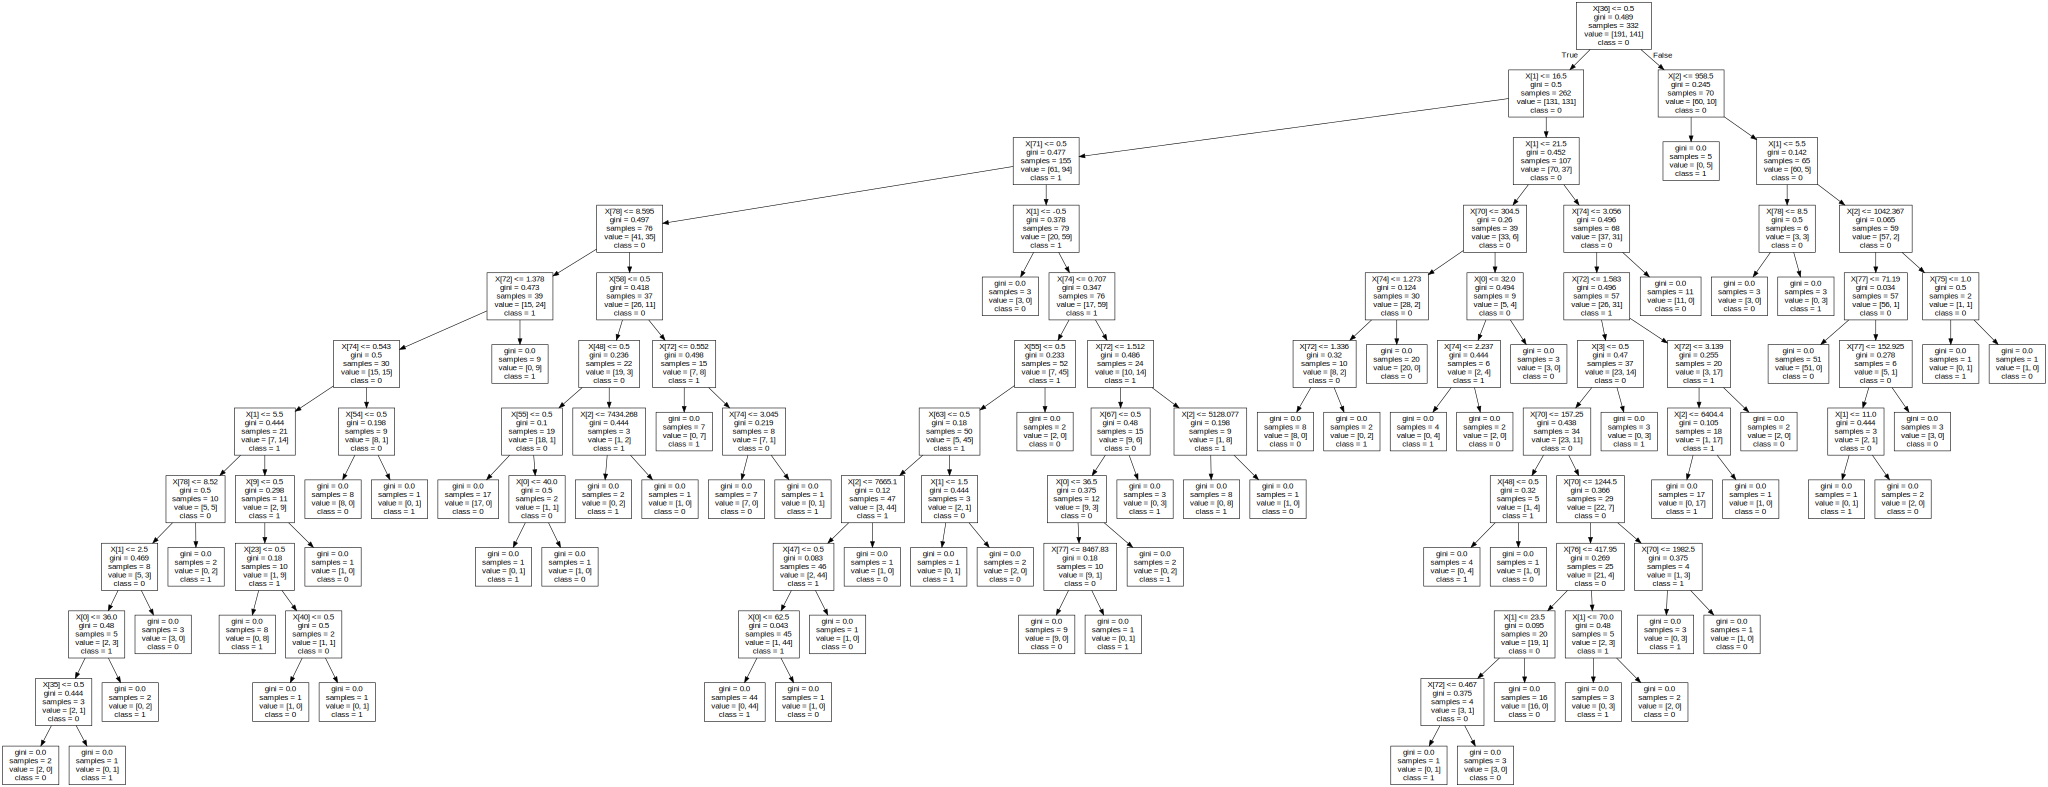

In [53]:
# Cria a arvore de decisão em PDF e mostra em imagem também
dot_data = export_graphviz(dt, out_file=None, class_names=list(map(str, dt.classes_))) 
graph = graphviz.Source(dot_data)
graph.render('ArvoreDeDecisão.pdf')
graph

### 5.3.3 Reporte das métricas de classificação

In [54]:
# Mostrando o resultado do modelo
results_dt = (dt.score( x_train_tree, y_train_tree), dt.score( x_test_tree, y_test_tree))
print('Acuracidade (treino): ', dt.score( x_train_tree, y_train_tree))
print('Acuracidade (teste): ', dt.score( x_test_tree, y_test_tree))

print(classification_report(y_test_tree, y_pred_tree))

Acuracidade (treino):  1.0
Acuracidade (teste):  0.7132867132867133
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        93
           1       0.58      0.64      0.61        50

    accuracy                           0.71       143
   macro avg       0.69      0.70      0.69       143
weighted avg       0.72      0.71      0.72       143



###5.3.4 Aplicação e definição de hiperparâmetros

####5.3.4.1 GridSearchCV

In [55]:
X_grid_search_tree = features
y_grid_search_tree = df_everymind[['Saiu']]

parametros = {
	"criterion":['gini','entropy'],
	"max_depth":range(1,10),
	"min_samples_split":range(1,10),
	"min_samples_leaf":range(1,5)
}

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train_tree, y_train_tree.squeeze())


360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

One or more of the test scores are non-finite: [       nan 0.551

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

####5.3.4.2 RandomizedSearchCV

In [56]:
parametros = {
	"criterion":['gini','entropy'],
	"max_depth":range(1,10),
	"min_samples_split":range(1,10),
	"min_samples_leaf":range(1,5)
}

random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=parametros)
random_search.fit(x_train_tree, y_train_tree.squeeze())


10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

One or more of the test scores are non-finite: [0.65056536 0.6594301

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)})

### 5.3.5 Matriz de confusão e report de classificação

Melhores com GridSearchCV: 0.7318407960199004
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        93
           1       0.60      0.54      0.57        50

    accuracy                           0.71       143
   macro avg       0.68      0.67      0.68       143
weighted avg       0.71      0.71      0.71       143



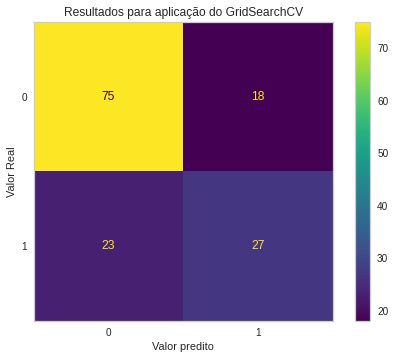

Melhor acurácia com RandomizedSearchCV: 0.7137042062415198
Melhores parâmetros: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        93
           1       0.58      0.58      0.58        50

    accuracy                           0.71       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.71      0.71      0.71       143



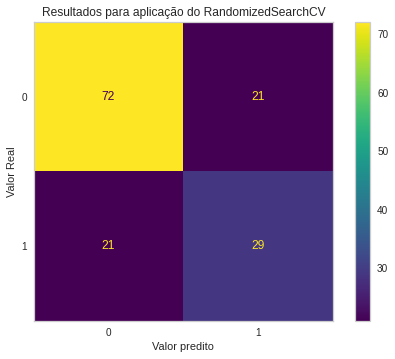

In [57]:
if grid_search.best_score_ > random_search.best_score_:
  results_dt_hparams = (grid_search.best_score_, grid_search.best_estimator_.score(x_test_tree, y_test_tree))
else:
  results_dt_hparams = (random_search.best_score_, random_search.best_estimator_.score(x_test_tree, y_test_tree))

# Resultado da predição da Árvore de Decisão com GridSearchCV usando dados de teste
print("Melhores com GridSearchCV: " + str(grid_search.best_score_))
print("Melhores parâmetros: " + str(grid_search.best_params_))

y_pred_grid = grid_search.predict(x_test_tree)

print(classification_report(y_test_tree, y_pred_grid))

cm_grid = confusion_matrix(y_test_tree, y_pred_grid)

# versão visual da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid, 
                             display_labels=grid_search.classes_)

disp.plot()
plt.grid(False)
plt.xlabel('Valor predito') 
plt.ylabel('Valor Real') 
plt.title("Resultados para aplicação do GridSearchCV")
plt.show()

# ------------------------------------------------------------------------------

# Resultado da predição da Árvore de Decisão com RandomizedSearchCV usando dados de teste
print("Melhor acurácia com RandomizedSearchCV: " + str(random_search.best_score_))
print("Melhores parâmetros: " + str(random_search.best_params_))

# Matriz de confusão para RandomizedSearchCV
best_rand_dt = random_search.best_estimator_
y_pred_rand_dt = best_rand_dt.predict(x_test_tree)

print(classification_report(y_test_tree, y_pred_rand_dt))

cm_random_dt = confusion_matrix(y_test_tree, y_pred_rand_dt)

# versão visual da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_dt, 
                             display_labels=random_search.classes_)

disp.plot()
plt.grid(False)
plt.xlabel('Valor predito') 
plt.ylabel('Valor Real') 
plt.title("Resultados para aplicação do RandomizedSearchCV")
plt.show()

### 5.3.6 Validação Cruzada

In [58]:
x_tree = features
y_tree = df_everymind[['Saiu']]
means_dt = cross_val_score(dt, x_tree, y_tree, cv=10, scoring='accuracy')

means_dt.mean()

0.7390957446808512

###5.3.7 Teste com diferentes "random_state"

In [59]:
x_tree_state = features
y_tree_state = df_everymind[['Saiu']]

resultadosTrain = []
resultadosTest = []
for i in range(30,100):
  x_train_tree_state, x_test_tree_state, y_train_tree_state, y_test_tree_state = train_test_split(x_tree_state, y_tree_state, 
                                                    test_size = 0.3, 
                                                     random_state = i)
  
  dt_state = DecisionTreeClassifier(max_depth=2, criterion='entropy', min_samples_leaf=2, min_samples_split=3)
  dt_state.fit(x_train_tree_state, y_train_tree_state.squeeze())
  print('Acuracidade (treino): ', i , dt_state.score( x_train_tree_state, y_train_tree_state))
  print('Acuracidade (teste): ', i, dt_state.score( x_test_tree_state, y_test_tree_state))
  resultadosTrain.append(dt_state.score(x_train_tree_state, y_train_tree_state))
  resultadosTest.append(dt_state.score(x_test_tree_state, y_test_tree_state))
print(max(resultadosTest))

Acuracidade (treino):  30 0.6475903614457831
Acuracidade (teste):  30 0.5524475524475524
Acuracidade (treino):  31 0.7018072289156626
Acuracidade (teste):  31 0.6713286713286714
Acuracidade (treino):  32 0.7078313253012049
Acuracidade (teste):  32 0.6783216783216783
Acuracidade (treino):  33 0.7228915662650602
Acuracidade (teste):  33 0.6433566433566433
Acuracidade (treino):  34 0.6385542168674698
Acuracidade (teste):  34 0.5944055944055944
Acuracidade (treino):  35 0.5993975903614458
Acuracidade (teste):  35 0.5734265734265734
Acuracidade (treino):  36 0.6957831325301205
Acuracidade (teste):  36 0.7132867132867133
Acuracidade (treino):  37 0.7018072289156626
Acuracidade (teste):  37 0.6713286713286714
Acuracidade (treino):  38 0.6445783132530121
Acuracidade (teste):  38 0.6223776223776224
Acuracidade (treino):  39 0.6957831325301205
Acuracidade (teste):  39 0.7132867132867133
Acuracidade (treino):  40 0.6897590361445783
Acuracidade (teste):  40 0.7272727272727273
Acuracidade (treino):

In [60]:
# Definindo X (Feaures utilizadas) e Y (Resposta de Saída ou Permanencia em SIM(1) ou NÃO(0))
x_tree_tst = features
y_tree_tst = df_everymind[['Saiu']]

# ros_tree = RandomOverSampler(random_state=0)
# x_resampled_tree, y_resampled_tree = ros_tree.fit_resample(x_tree_tst, y_tree_tst)

# Separa treino e teste, definindo porcentagem de separação e random_state
x_train_tree_tst, x_test_tree_tst, y_train_tree_tst, y_test_tree_tst = train_test_split(x_tree_tst, y_tree_tst, 
                                                    test_size = 0.3, 
                                                     random_state = 72)

# Mostra os tamanhos do X e Y de treino e teste
print("Tamanho do X treino:", x_train_tree_tst.shape)
print("Tamanho do Y treino:", y_train_tree_tst.shape)
print("Tamanho do X teste:", x_test_tree_tst.shape)
print("Tamanho do Y teste:", y_test_tree_tst.shape)

# Rodando o modelo de Decision Tree
dt_tst = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_leaf=2, min_samples_split=3)
dt_tst.fit(x_train_tree, y_train_tree.squeeze())

# Mostrando o resultado do modelo
print('Acuracidade (treino): ', dt.score( x_train_tree_tst, y_train_tree_tst ))
print('Acuracidade (teste): ', dt.score( x_test_tree_tst, y_test_tree_tst ))

Tamanho do X treino: (332, 79)
Tamanho do Y treino: (332, 1)
Tamanho do X teste: (143, 79)
Tamanho do Y teste: (143, 1)
Acuracidade (treino):  1.0
Acuracidade (teste):  0.7132867132867133


## 5.4 RandomForest

Random Forest é um método de aprendizado em conjunto utilizado para classificação, regressão e outras tarefas que necessitem de diversas árvores de decisão simultâneas. O método consiste na criação de várias árvores de decisão  diferentes (por isso a analogia com "floresta"), as quais geram resultados distintos que são posteriormente tratados e analisados dependendo do problema que deve ser solucionado. Para problemas de classificação, o resultado mais frequente é escolhido; já para regressão, uma média entre os resultados é gerada. Como exemplo, podemos utilizar a situação de ir ou não à praia, na qual, ao invés de uma única árvore, várias são geradas em sequência e seus resultados finais são contabilizados. Ao final, a resposta com maior presença "Ir à praia"/"Não ir à praia" será levada em consideração.

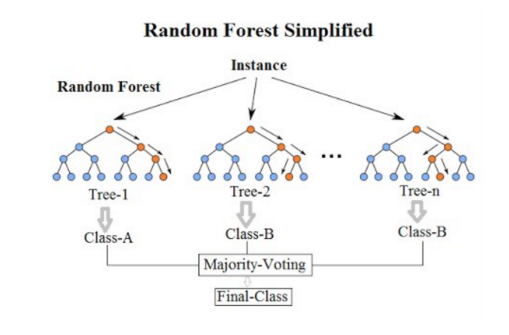

### 5.4.1 Aplicação do modelo

Foi aplicada a sobreamostragem (Oversampling) pois a aplicação desse método auxiliou na melhora dos resultados.

In [61]:
x_rf = features
y_rf = df_everymind[['Saiu']]

# Aplicação do oversampling

ros = RandomOverSampler(random_state=0)
x_rf_resampled, y_rf_resampled = ros.fit_resample(x_rf, y_rf)

# Dividimos entre tabela de treino e de teste

x_treino_rf, x_teste_rf, y_treino_rf, y_teste_rf = train_test_split(x_rf_resampled, y_rf_resampled, test_size = 0.3, random_state = 42)

# Analisamos o tamanho das tabelas criadas

x_teste_rf.shape, y_teste_rf.shape, x_treino_rf.shape, y_treino_rf.shape

random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest.fit(x_treino_rf, y_treino_rf)

previsoes_forest = random_forest.predict(x_teste_rf)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


### 5.4.2 Criação de visualização da matriz de confusão

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.8070175438596491

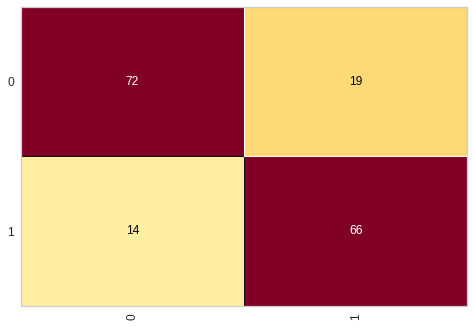

In [62]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_treino_rf, y_treino_rf)
cm.score(x_teste_rf, y_teste_rf)

### 5.4.3 Reporte das métricas de classificação

In [63]:
results_rf = (random_forest.score(x_treino_rf, y_treino_rf), random_forest.score(x_teste_rf, y_teste_rf))
print('Acuracidade (treino): ', random_forest.score(x_treino_rf, y_treino_rf))
print('Acuracidade (teste): ', accuracy_score(y_teste_rf, previsoes_forest))
print(classification_report(y_teste_rf, previsoes_forest))

Acuracidade (treino):  1.0
Acuracidade (teste):  0.8070175438596491
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        91
           1       0.78      0.82      0.80        80

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.81      0.81      0.81       171



### 5.4.4 Aplicação e definição de hiperparâmetros

In [64]:
params = {
'n_estimators': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 'min_samples_split':  [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'max_depth':  [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 'bootstrap': [True, False]
}

rand_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=params)
rand_search.fit(x_treino_rf, y_treino_rf.squeeze())

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 5, 10, 20, 30, 40,
                                                      50, 60, 70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 5, 10, 20, 30,
                                                         40, 50, 60, 70, 80,
                                                         90]})

###5.4.5 Matriz de confusão e reporte de classificação

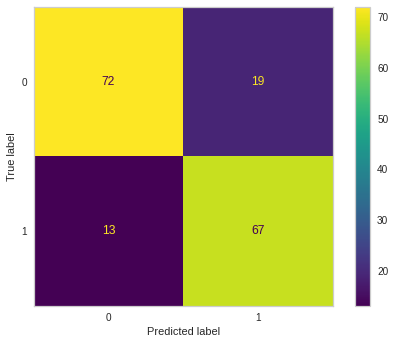

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        91
           1       0.78      0.84      0.81        80

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.82      0.81      0.81       171

Acuracidade (treino):  0.9924433249370277
Acuracidade (teste):  0.8128654970760234
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=90)

 The best score across ALL searched params:
 0.8288291139240507

 The best parameters across ALL searched params:
 {'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
0.8288291139240507
{'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [65]:
best_rf_par = rand_search.best_estimator_
y_rf_pred_Hpar = best_rf_par.predict(x_teste_rf)

cm_rf_hy_par = confusion_matrix(y_teste_rf, y_rf_pred_Hpar)
disp_par = ConfusionMatrixDisplay(confusion_matrix=cm_rf_hy_par, 
                              display_labels=rand_search.classes_)
disp_par.plot()
plt.grid(False)
plt.show()

results_rf_hparams = (best_rf_par.score( x_treino_rf, y_treino_rf), best_rf_par.score( x_teste_rf, y_teste_rf))

print(classification_report(y_teste_rf, y_rf_pred_Hpar))
print('Acuracidade (treino): ', best_rf_par.score( x_treino_rf, y_treino_rf ))
print('Acuracidade (teste): ', best_rf_par.score( x_teste_rf, y_teste_rf ))

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_search.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_search.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_search.best_params_)

print(rand_search.best_score_)
print(rand_search.best_params_)

### 5.4.6 Validação Cruzada

In [66]:
means_rf = cross_val_score(random_forest, x_rf, y_rf, cv=5)
means_rf.mean()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7578947368421053

### 5.4.7 Teste com diferentes "random_state"

In [67]:
for i in range(10):
  x_rf = features
  y_rf = df_everymind[['Saiu']]

  ros = RandomOverSampler(random_state=0)

  x_rf_resampled, y_rf_resampled = ros.fit_resample(x_rf, y_rf)


  x_treino_rf, x_teste_rf, y_treino_rf, y_teste_rf = train_test_split(x_rf_resampled, y_rf_resampled, test_size = 0.3, random_state = i)

  # Instaciando o objeto scaler
  scaler = MinMaxScaler()

  x_treino_rf = scaler.fit_transform(x_treino_rf)

  x_teste_rf = scaler.transform(x_teste_rf)
  random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
  random_forest.fit(x_treino_rf, y_treino_rf)


  previsoes_forest = random_forest.predict(x_teste_rf)
  print(random_forest.score(x_treino_rf, y_treino_rf), end=" ")
  print(i)
  print(classification_report(y_teste_rf, previsoes_forest))


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0 0
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        77
           1       0.82      0.70      0.76        94

    accuracy                           0.75       171
   macro avg       0.76      0.76      0.75       171
weighted avg       0.77      0.75      0.75       171

0.9974811083123426 1
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        81
           1       0.83      0.88      0.85        90

    accuracy                           0.84       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.84      0.84      0.84       171

1.0 2
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        88
           1       0.82      0.89      0.86        83

    accuracy                           0.85       171
   macro avg       0.86      0.85      0.85       171
weighted avg       0.86      0.85      0.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0 3
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        85
           1       0.81      0.91      0.86        86

    accuracy                           0.85       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.85      0.85      0.85       171

1.0 4
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        80
           1       0.85      0.79      0.82        91

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.82      0.81      0.81       171

1.0 5
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        71
           1       0.89      0.74      0.81       100

    accuracy                           0.80       171
   macro avg       0.80      0.81      0.79       171
weighted avg       0.81      0.80      0.80       171



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0 6
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        83
           1       0.78      0.76      0.77        88

    accuracy                           0.77       171
   macro avg       0.77      0.77      0.77       171
weighted avg       0.77      0.77      0.77       171

1.0 7
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        81
           1       0.85      0.89      0.87        90

    accuracy                           0.86       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.86      0.86      0.86       171

0.9974811083123426 8
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        87
           1       0.77      0.80      0.78        84

    accuracy                           0.78       171
   macro avg       0.78      0.78      0.78       171
weighted avg       0.78      0.78      0.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


## 5.5 Support Vector Machine

A Support Vector Machines (Máquinas de Vetores de Suporte) é um conjunto de métodos de aprendizado supervisionado usado para classificação, regressão e detecção de outliers. Uma SVM constrói um hiperplano ou conjunto deles em um espaço dimensional, que pode ser usado para classificação, regressão ou outras tarefas e distribui os dados de treino de acordo com suas classificações.

Uma separação ótima é atingida pelo hiperplano com maior distância aos dados de treinamento mais próximos de cada classe (chamados de margens funcionais), sendo todos os dados de um lado do plano classificados de uma maneira e, analogamente, os dados do outro são rotulados com outra classe.


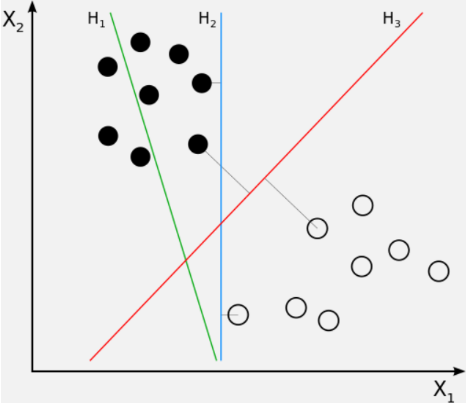

### 5.5.1 Aplicação do modelo

Foi aplicada a sobreamostragem (Oversampling) pois a aplicação desse método auxiliou na melhora dos resultados.

In [68]:
# Dividindo x e y
x_svm = features
y_svm = df_everymind[['Saiu']]

# Aplicação do oversampling
ros = RandomOverSampler(random_state=0)
x_svm, y_svm = ros.fit_resample(x_svm, y_svm)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.3, random_state=1)

# Utilizando o algoritmo e dados de treino, preparamos o algoritmo de predição

svm_T = SVC(gamma='auto', probability=True)
svm_T.fit(x_train_svm, y_train_svm.values.ravel())

svm_classifier_prediction = svm_T.predict(x_test_svm)

### 5.5.2 Criação de visualização da matriz de confusão

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


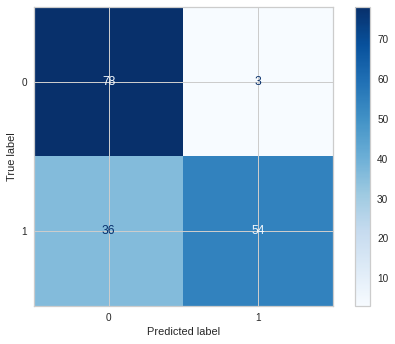

In [69]:
plot_confusion_matrix(svm_T, x_test_svm, y_test_svm, cmap='Blues')

### 5.5.3 Reporte das métricas de classificação

In [70]:
results_svm = (svm_T.score(x_train_svm, y_train_svm), svm_T.score(x_test_svm, y_test_svm))
print('Acuracidade (treino): ', svm_T.score(x_train_svm, y_train_svm))
print('Acuracidade (teste): ', accuracy_score(y_test_svm, svm_classifier_prediction))
print(classification_report(y_test_svm, svm_classifier_prediction))

Acuracidade (treino):  0.9722921914357683
Acuracidade (teste):  0.7719298245614035
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        81
           1       0.95      0.60      0.73        90

    accuracy                           0.77       171
   macro avg       0.82      0.78      0.77       171
weighted avg       0.82      0.77      0.77       171



### 5.5.4 Aplicação e definição de hiperparâmetros 

Foi aplicada a padronização (Standard Scaler) pois a aplicação desse método auxiliou na melhora do desempenho do método (tempo de execução).

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, test_size=0.3, random_state=6)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Definição dos parâmetros úteis para ajuste de hiperparâmetros
svc = SVC(gamma='auto')
parameters_svm = {
      'C': [0.1, 1, 10, 100, 1000],
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      'kernel': ['rbf', 'linear', 'sigmoid'],
      # 'n_iter': [30,50,100],
      # 'coef0': [0.1, 0.5, 1, 2, 5, 10],
      # 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      # 'shrinking': [True, False],
      # 'probability': [True, False],
      # 'tol': [0.001, 0.0001, 0.00001],
      # 'cache_size': [200, 400, 600, 800, 1000],
      # 'class_weight': ['balanced', None],
      # 'max_iter': [-1, 1000, 2000, 3000, 4000, 5000],
      # 'decision_function_shape': ['ovo', 'ovr'],
      # 'random_state': [i],
      # 'break_ties': [True, False],
      # 'precomputed': [True, False]
}

#### 5.5.4.1 GridSearchCV

In [72]:
# Otimização da escolha dos hiperparâmetros usando GridSearchCV - CODIGO ABAIXO COMENTADO POR DEMORAR NA EXECUÇÃO DA CELULA

# clf = GridSearchCV(svc, parameters_svm, cv=5)
# clf.fit(x_train, y_train.values.ravel())

#### 5.5.4.2 RandomizedSearchCV

In [73]:
# Otimização da escolha dos hiperparâmetros usando RandomizedSearchCV - CODIGO ABAIXO COMENTADO POR DEMORAR NA EXECUÇÃO DA CELULA

# rs = RandomizedSearchCV(svc, parameters_svm, cv=5, return_train_score = False)
# rs.fit(x_train, y_train.values.ravel())

### 5.5.5 Matriz de confusão e reporte de classificação

In [74]:
# ------------------------------------------------------------------------------
#if clf.best_score_ > rs.best_score_:
#  results_svm_hparams = (clf.best_score_, clf.best_estimator_.score(x_test_tree, y_test_tree))
#else:
#  results_svm_hparams = (rs.best_score_, rs.best_estimator_.score(x_test_tree, y_test_tree))

# Resultado da predição do svm com GridSearchCV usando dados de teste - CODIGO ABAIXO COMENTADO POR DEMORAR NA EXECUÇÃO DA CELULA
# print("Melhores com GridSearchCV: " + str(clf.best_score_))
# print("Melhores parâmetros: " + str(clf.best_params_))

# x_pred_grid = clf.predict(x_test)

# print(classification_report(y_test, x_pred_grid))

# cm_grid = confusion_matrix(y_test, x_pred_grid)

# # versão visual da matriz
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid, 
#                              display_labels=clf.classes_)

# disp.plot()
# plt.xlabel('Valor predito') 
# plt.ylabel('Valor Real') 
# plt.title("Resultados para aplicação do GridSearchCV")
# plt.show()

# ------------------------------------------------------------------------------

# Resultado da predição do svm com RandomizedSearchCV usando dados de teste
# print("Melhor acurácia com RandomizedSearchCV: " + str(rs.best_score_))
# print("Melhores parâmetros: " + str(rs.best_params_))

# x_pred_random = rs.predict(x_test)

# print(classification_report(y_test, x_pred_random))

# cm_random = confusion_matrix(y_test, x_pred_random)

# # versão visual da matriz
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_random, 
#                              display_labels=rs.classes_)

# disp.plot()
# plt.xlabel('Valor predito') 
# plt.ylabel('Valor Real') 
# plt.title("Resultados para aplicação do RandomizedSearchCV")
# plt.show()

### 5.5.6 Validação Cruzada

In [75]:
means_svm = cross_val_score(svm_T, x_svm, y_svm, cv=5)
print(means_svm.mean())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.7909951870827511


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### 5.5.7 Teste com diferentes "random_state"

In [76]:
# svm_best_param = []

# for i in range(0, 101):
#   x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, test_size=0.3, random_state=i)
    
#   # Aplicação das métricas de padronização

#   sc = StandardScaler()
#   x_train = sc.fit_transform(x_train)
#   x_test = sc.transform(x_test)

#   svm_T = SVC(gamma='auto')
#   svm_T.fit(x_train, y_train.values.ravel())
#   svm_best_param.append(svm_T.score(x_test, y_test.values.ravel()))

# # Resultado da predição do svm usando dados de teste

# print("Acurácia média usando SVM: " +  str(np.mean(svm_best_param)))
# print("Acurácia máxima usando SVM: " + str(np.amax(svm_best_param)))
# print("Acurácia mínima usando SVM: " + str(np.amin(svm_best_param)))
# print("Variância: " + str(np.var(svm_best_param)))

# x_pred_svm = svm_T.predict(x_test)

# print(classification_report(y_test, x_pred_svm))

# cm = confusion_matrix(y_test, x_pred_svm)

# # versão visual da matriz
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
#                               display_labels=svm_T.classes_)

# disp.plot()
# plt.xlabel('Valor predito') 
# plt.ylabel('Valor Real') 
# plt.title("Resultados para aplicação do SVM")
# plt.show()

A partir das pontuações obtidas pelo modelo 

## 5.6 Regressão Logística

Algoritmo classificatório de aprendizado supervisionado, nesse caso regressão logística binária, que tem como função categorizar alguma variável por classes. Nesta técnica estatística de mineração de dados, a variável dependente deve ser categórica e as variáveis independentes podem ser métricas ou categóricas. O algoritmo avalia a probabilidade de tal evento ocorrer e entende como as variáveis independentes influenciam em cada evento.

Basicamente, é aplicado a transformação linear para que os valores se tornem probabilidades, então é utilizado a função logística (sigmóide) para criar uma função em ‘S’ no gráfico e classificar as variáveis.

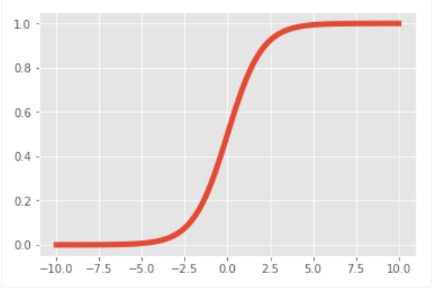


### 5.6.1 Aplicação do modelo

Foi aplicada a padronização (Standard Scaler) pois a aplicação desse método auxiliou na melhora do desempenho do método (tempo de execução).

In [77]:
x_rl = features
y_rl = df_everymind[['Saiu']].values.ravel()

x_rl_train, x_rl_test, y_rl_train, y_rl_test = train_test_split(x_rl, y_rl, 
                                                    test_size = 0.3, 
                                                    random_state = 6)

# Aplicando a padronização
scaler_rl = StandardScaler()
x_rl_train = scaler_rl.fit_transform(x_rl_train)
x_rl_test = scaler_rl.transform(x_rl_test)


# Treinando o modelo
rlg = LogisticRegression(max_iter=10000)
model = rlg.fit(x_rl_train, y_rl_train)

### 5.6.2 Criação de visualização da matriz de confusão

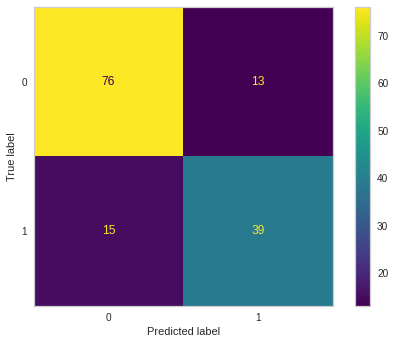

In [78]:
y_rl_pred = model.predict(x_rl_test)
cm_lr = confusion_matrix(y_rl_test, y_rl_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                              display_labels=rlg.classes_)

disp.plot()
plt.grid(False)
plt.show()

### 5.6.3 Reporte das métricas de classificação

In [79]:
results_lr = (rlg.score( x_rl_train, y_rl_train), rlg.score( x_rl_test, y_rl_test))
print('Acuracidade (treino): ', rlg.score( x_rl_train, y_rl_train))
print('Acuracidade (teste): ', rlg.score( x_rl_test, y_rl_test))
print(classification_report(y_rl_test, y_rl_pred))

Acuracidade (treino):  0.8132530120481928
Acuracidade (teste):  0.8041958041958042
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        89
           1       0.75      0.72      0.74        54

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



In [80]:
medias = cross_val_score(model, x_rl, y_rl, cv=5)
medias.mean()

0.7263157894736841

### 5.6.4 Aplicação e definição de hiperparâmetros

In [81]:
x_rl_par = features
y_rl_par = df_everymind[['Saiu']].values.ravel()

x_rl_train_par, x_rl_test_par, y_rl_train_par, y_rl_test_par = train_test_split(x_rl_par, y_rl_par, 
                                                    test_size = 0.3, 
                                                    random_state = 6)
scaler_rl_par = StandardScaler()
x_rl_train_par = scaler_rl_par.fit_transform(x_rl_train_par)
x_rl_test_par = scaler_rl_par.transform(x_rl_test_par)

# Treinando o modelo
rlg_par = LogisticRegression(max_iter=10000)
model_par = rlg_par.fit(x_rl_train_par, y_rl_train_par)
#max_iter=1000
# Fazendo as predições
y_rl_pred_par = model_par.predict(x_rl_test)

parameters_par = {
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [100, 10, 1.0, 0.1, 0.01],
              'penalty': ['elasticnet', 'l1', 'l2']
              }

In [82]:
randm_src_par = RandomizedSearchCV(estimator=model, param_distributions = parameters_par,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src_par.fit(x_rl_train_par, y_rl_train_par)


12 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

----------------------------------------

RandomizedSearchCV(cv=2, estimator=LogisticRegression(max_iter=10000),
                   n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['elasticnet', 'l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

###5.6.5 Matriz de confusão e reporte de classificação

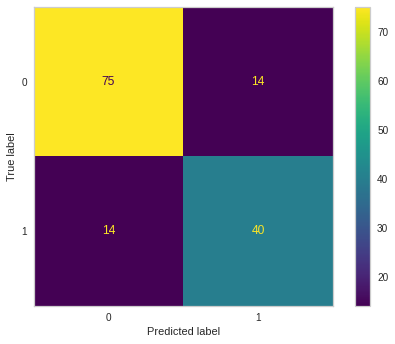

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        89
           1       0.74      0.74      0.74        54

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143

Acuracidade (treino):  0.8192771084337349
Acuracidade (teste):  0.8041958041958042
 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')

 The best score across ALL searched params:
 0.7228915662650602

 The best parameters across ALL searched params:
 {'solver': 'saga', 'penalty': 'l1', 'C': 10}


In [83]:
best_rl_par = randm_src_par.best_estimator_
y_rl_pred_H_par = best_rl_par.predict(x_rl_test_par)

cm_lr_hy_par = confusion_matrix(y_rl_test_par, y_rl_pred_H_par)
disp_par = ConfusionMatrixDisplay(confusion_matrix=cm_lr_hy_par, 
                              display_labels=rlg.classes_)
disp_par.plot()
plt.grid(False)
plt.show()

results_lr_hparams = (best_rl_par.score(x_rl_train_par, y_rl_train_par), best_rl_par.score(x_rl_test_par, y_rl_test_par))

print(classification_report(y_rl_test_par, y_rl_pred_H_par))
print('Acuracidade (treino): ', best_rl_par.score(x_rl_train_par, y_rl_train_par ))
print('Acuracidade (teste): ', best_rl_par.score(x_rl_test_par, y_rl_test_par ))

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src_par.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src_par.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src_par.best_params_)

###5.6.6 Validação Cruzada

In [84]:
means_lr = cross_val_score(model_par, x_rl, y_rl, cv=5)
means_lr.mean()

0.7263157894736841

###5.6.7. Teste com diferentes "random_state"

In [85]:
for i in range(10):
  x_rl_train, x_rl_test, y_rl_train, y_rl_test = train_test_split(x_rl, y_rl, 
                                                      test_size = 0.3, 
                                                      random_state = i)
  scaler_rl = StandardScaler()
  x_rl_train = scaler_rl.fit_transform(x_rl_train)
  x_rl_test = scaler_rl.transform(x_rl_test)


  # Treinando o modelo
  rlg = LogisticRegression(max_iter=1000)
  model = rlg.fit(x_rl_train, y_rl_train)
  #max_iter=1000
  # Fazendo as predições
  y_rl_pred = model.predict(x_rl_test)
  print(i)
  print('Acuracidade (treino): ', rlg.score( x_rl_train, y_rl_train ))
  print('Acuracidade (teste): ', rlg.score( x_rl_test, y_rl_test ))

0
Acuracidade (treino):  0.8493975903614458
Acuracidade (teste):  0.7482517482517482
1
Acuracidade (treino):  0.8463855421686747
Acuracidade (teste):  0.7482517482517482
2
Acuracidade (treino):  0.8162650602409639
Acuracidade (teste):  0.7902097902097902
3
Acuracidade (treino):  0.8192771084337349
Acuracidade (teste):  0.7132867132867133
4
Acuracidade (treino):  0.8433734939759037
Acuracidade (teste):  0.7552447552447552
5
Acuracidade (treino):  0.858433734939759
Acuracidade (teste):  0.7272727272727273
6
Acuracidade (treino):  0.8132530120481928
Acuracidade (teste):  0.8041958041958042
7
Acuracidade (treino):  0.8674698795180723
Acuracidade (teste):  0.6993006993006993
8
Acuracidade (treino):  0.8433734939759037
Acuracidade (teste):  0.7552447552447552
9
Acuracidade (treino):  0.8493975903614458
Acuracidade (teste):  0.7482517482517482


#6.Avaliação dos modelos

Para definir o desempenho de um algoritmo e, consequentemente, seu sucesso ou fracasso, utilizamos métricas estatísticas que auxiliam a avaliar os resultados gerados. O sucesso de um algoritmo/método/classificador é definido pela análise dos resultados do conjunto de métricas, principalmente pela pontuação de sua acurácia, da área abaixo da curva ROC e dos resultados da matriz de confusão.

Neste tópico, resumiremos todos os resultados apresentados pelos modelos e, a partir da analise destes, evidenciaremos os melhores e piores desempenhos.





In [86]:
# Resultados dos modelos
print("Resultados KNN: ", results_knn)
print("Resultados Naive Bayes: ", results_naive_bayes)
print("Resultados Decision Tree: ", results_dt)
print("Resultados Random Forest: ", results_rf)
print("Resultados SVM: ", results_svm)
print("Resultados Regressão Logística: ", results_lr)

print('')

# Resultados dos valores médios para validação cruzada
print("Resultado KNN: ", means_knn.mean())
print("Resultado Naive Bayes: ", means_nb.mean())
print("Resultado Decision Tree: ", means_dt.mean())
print("Resultado Random Forest: ", means_rf.mean())
print("Resultado SVM: ", means_svm.mean())
print("Resultado Regressão Logística: ", means_lr.mean())


print('')

# Resultados dos modelos com hiperparâmetros
print("Resultados KNN: ", results_knn_hparams)
print("Resultados Naive Bayes: ", results_naive_bayes_hparams)
print("Resultados Decision Tree: ", results_dt_hparams)
print("Resultados Random Forest: ", results_rf_hparams)
# print("Resultados SVM: ", results_svm_hparams)
print("Resultados Regressão Logística: ", results_lr_hparams)

Resultados KNN:  (0.7680722891566265, 0.6573426573426573)
Resultados Naive Bayes:  (0.5566750629722922, 0.6140350877192983)
Resultados Decision Tree:  (1.0, 0.7132867132867133)
Resultados Random Forest:  (1.0, 0.8070175438596491)
Resultados SVM:  (0.9722921914357683, 0.7719298245614035)
Resultados Regressão Logística:  (0.8132530120481928, 0.8041958041958042)

Resultado KNN:  0.6821052631578948
Resultado Naive Bayes:  0.5894736842105263
Resultado Decision Tree:  0.7390957446808512
Resultado Random Forest:  0.7578947368421053
Resultado SVM:  0.7909951870827511
Resultado Regressão Logística:  0.7263157894736841

Resultados KNN:  (0.7104278074866311, 0.6643356643356644)
Resultados Naive Bayes:  (0.7355163727959698, 0.695906432748538)
Resultados Decision Tree:  (0.7318407960199004, 0.7132867132867133)
Resultados Random Forest:  (0.9924433249370277, 0.8128654970760234)
Resultados Regressão Logística:  (0.8192771084337349, 0.8041958041958042)


Através da análise das pontuações obtidos, podemos considerar que todos os resultados que apresentam o valor 1.0 como valor da acuracidade para conjuntos de treino encontram-se altamente influenciados pelos dados apresentados (overfitting) e não necessariamente performam da mesma forma com outros casos de teste, como é observável nos modelos Decision Tree e Random Forest.

Nos testes de validação cruzada, os modelos mantiveram um desempenho parecido com o apresentado na primeira aplicação aplicação. 

Na aplicação dos hiperparâmetros, é notável a redução do overfitting e aumento no desempenho geral dos modelos. 

#7.Conclusão dos modelos

Principais e melhores resultados do seu projeto e recomendações formais sobre o uso do modelo.

## 7.1 SHAP - Explicação do modelo de aprendizado de máquina 

### 7.1.1 Apresentando o conjunto de dados

In [87]:
features.columns = features.columns.map(lambda row: "_".join(row.lower().split(" ")))
features

,idade,numeromeses,salario_mês,arquiteto,arquitetosr,assistentei,assistenteii,auxiliardelimpeza,comercialis,comercialpl,...,remoto,mediatempopromoção,dev,autoavaeverymind,numautoavaev,gestoavaeverymind,numgestoavaev,qtndhorasever,valorhorasever,notaarea
0,37,4,2250.000,0,0,0,0,0,0,0,...,1,0.0,0,0.000000,0,0.000000,0,0.0,0.000000,9.40
1,35,1,5000.000,0,0,0,0,0,0,0,...,1,0.0,0,0.000000,0,0.000000,0,0.0,0.000000,8.46
2,31,5,8500.000,0,0,0,0,0,0,0,...,1,0.0,1,0.000000,0,0.000000,0,0.0,0.000000,8.29
3,31,6,1500.000,0,0,0,0,0,0,0,...,0,0.0,0,0.000000,0,0.000000,0,10.0,301.390000,8.75
4,40,18,11792.100,0,0,0,0,0,0,0,...,0,0.0,0,0.000000,0,0.000000,0,0.0,0.000000,8.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,40,36,3966.270,0,0,0,0,0,0,0,...,0,0.0,1,1.666667,1,1.527778,1,131.6,8348.487525,8.53
471,40,61,4725.635,0,0,0,0,0,0,0,...,0,0.0,0,0.000000,0,1.597222,1,0.0,0.000000,8.75
472,20,6,1000.000,0,0,0,0,0,0,0,...,0,0.0,1,0.000000,0,0.000000,0,0.0,0.000000,9.40
473,21,6,900.000,0,0,0,0,0,0,0,...,0,0.0,1,0.000000,0,0.000000,0,0.0,0.000000,8.87


[02:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


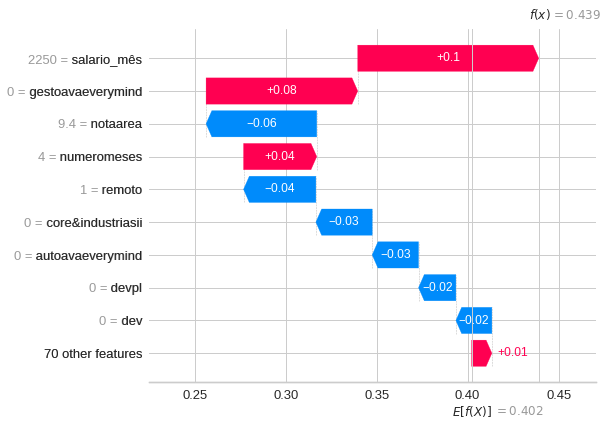

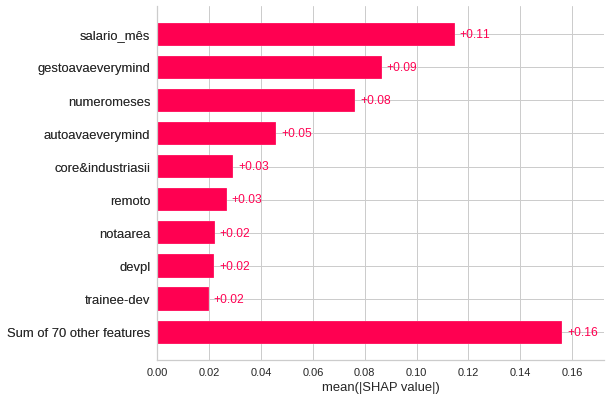

In [88]:
# train an XGBoost model
shap_test = xgboost.XGBRegressor().fit(x_rl, y_rl)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(shap_test)
shap_values = explainer(x_rl)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)

##7.2 Curva ROC
A curva ROC sintetiza a performance de previsão de um modelo de classificação. Particularmente, a curva ROC traça a Taxa de Falso Positivo na coordenada Y. Nesta celula, geramos a curva ROC para os modelos Naive-Bayes, SVM e Árvore de decisão.

KNN: AUROC = 0.712
Naive Bayes: AUROC = 0.637
Decision Tree: AUROC = 0.669
Random Forest: AUROC = 0.892
SVM: AUROC = 0.817
Logistic Regression: AUROC = 0.833


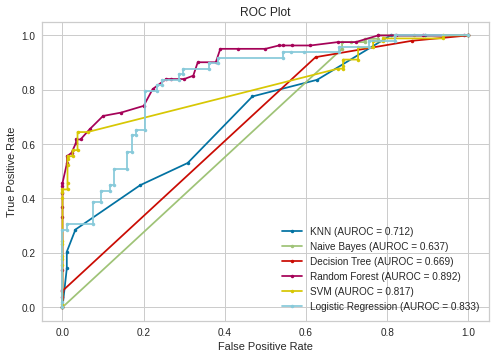

In [89]:
# Aplicando a curva ROC

# Calcula a probabilidade de classificação para cada dado

knn_probs = knn.predict_proba(x_knn_test)
nb_probs = naive_tipo_saida.predict_proba(x_by_teste)
dt_probs = dt_state.predict_proba(x_test_tree_tst)
rf_probs = random_forest.predict_proba(x_teste_rf)
svm_probs = svm_T.predict_proba(x_test_svm)
rlg_probs = rlg.predict_proba(x_rl_test)

knn_probs = knn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
svm_probs = svm_probs[:, 1]
rlg_probs = rlg_probs[:, 1]

# Calcula a área do gráfico abaixo da curva para todos os modelos

knn_auc = roc_auc_score(y_knn_test.squeeze(), knn_probs)
nb_auc = roc_auc_score(y_by_teste, nb_probs)
dt_auc = roc_auc_score(y_test_tree, dt_probs)
rf_auc = roc_auc_score(y_teste_rf, rf_probs)
svm_auc = roc_auc_score(y_test_svm, svm_probs)
rlg_auc = roc_auc_score(y_rl_test, rlg_probs)

# Imprime na tela os resultados calculados

print('KNN: AUROC = %.3f' % (knn_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('SVM: AUROC = %.3f' % (svm_auc))
print('Logistic Regression: AUROC = %.3f' % (rlg_auc))

# Criação das linhas que representam as curvas ROC

knn_fpr, knn_tpr, _ = roc_curve(y_knn_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_by_teste, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test_tree, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_teste_rf, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test_svm, svm_probs)
rlg_fpr, rlg_tpr, _ = roc_curve(y_rl_test, rlg_probs)

plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rlg_fpr, rlg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % rlg_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


KNN: AUROC = 0.815
Naive Bayes: AUROC = 0.753
Decision Tree: AUROC = 0.738
Random Forest: AUROC = 0.770
Logistic Regression: AUROC = 0.878


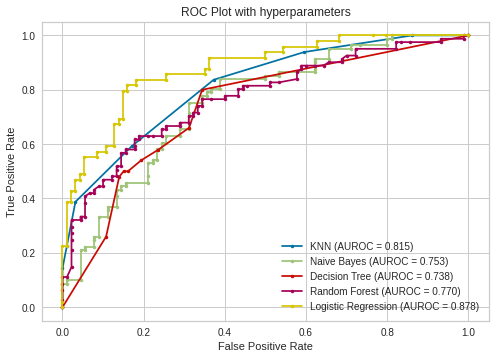

In [90]:
# Aplicando a curva ROC

# Calcula a probabilidade de classificação para cada dado

knn_probs = rdm.predict_proba(x_knn_test)
nb_probs = rand_search_b.predict_proba(x_by_teste)
dt_probs = grid_search.predict_proba(x_test_tree_tst)
rf_probs = rand_search.predict_proba(x_teste_rf)
#svm_probs = svm_T.predict_proba(x_test_svm)
rlg_probs = randm_src_par.predict_proba(x_rl_test)

knn_probs = knn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
#svm_probs = svm_probs[:, 1]
rlg_probs = rlg_probs[:, 1]

# Calcula a área do gráfico abaixo da curva para todos os modelos

knn_auc = roc_auc_score(y_knn_test.squeeze(), knn_probs)
nb_auc = roc_auc_score(y_by_teste, nb_probs)
dt_auc = roc_auc_score(y_test_tree, dt_probs)
rf_auc = roc_auc_score(y_teste_rf, rf_probs)
#svm_auc = roc_auc_score(y_test_svm, svm_probs)
rlg_auc = roc_auc_score(y_rl_test, rlg_probs)

# Imprime na tela os resultados calculados

print('KNN: AUROC = %.3f' % (knn_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
#print('SVM: AUROC = %.3f' % (svm_auc))
print('Logistic Regression: AUROC = %.3f' % (rlg_auc))

# Criação das linhas que representam as curvas ROC

knn_fpr, knn_tpr, _ = roc_curve(y_knn_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_by_teste, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test_tree, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_teste_rf, rf_probs)
#svm_fpr, svm_tpr, _ = roc_curve(y_test_svm, svm_probs)
rlg_fpr, rlg_tpr, _ = roc_curve(y_rl_test, rlg_probs)

plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
#plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rlg_fpr, rlg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % rlg_auc)
plt.title('ROC Plot with hyperparameters')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 7.3 Melhor algoritmo e métricas de classificação

Depois de todos os testes dos algoritmos, analises dos resutados e construção das curvas ROC, foi observado que os métodos que melhor performam são: Random Forest e Regressão Logística. Entretanto, como o Random Forest apresenta alto grau de vies dos dados de treino e baixo desempenho nos dados de teste(Overfitting), é recomendável a utilização da Regressão Logística para a predição de resultados. 


*   Acuracidade (treino):  0.8132530120481928
*   Acuracidade (teste):   0.8041958041958042  

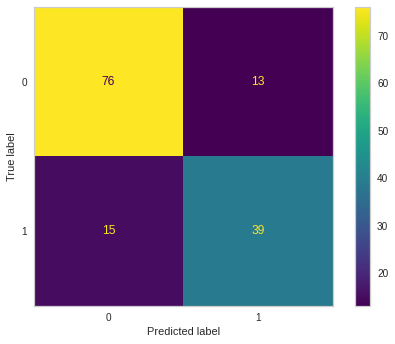

Com base na matriz de confusão gerada, podemos concluir que o método é o mais constante dentre os demais e apresenta um resultado preditivo satisfatório (Altos índices de acertos x baixos indices de erros).
